# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [45]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [46]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as mplt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data

Unnamed: 0.1  Unnamed: 0 Organisation  \
0                0           0       SpaceX   
1                1           1         CASC   
2                2           2       SpaceX   
3                3           3    Roscosmos   
4                4           4          ULA   
...            ...         ...          ...   
4319          4319        4319      US Navy   
4320          4320        4320         AMBA   
4321          4321        4321      US Navy   
4322          4322        4322    RVSN USSR   
4323          4323        4323    RVSN USSR   

                                               Location  \
0            LC-39A, Kennedy Space Center, Florida, USA   
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                         Pad A, Boca Chica, Texas, USA   
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4              SLC-41, Cape Canaveral AFS, Florida, USA   
...                                                 ...   
4319           LC-18A, Cape Canaveral AFS, Florida, USA   
4320           LC-26A, Cape Canaveral AFS, Florida, USA   
4321           LC-18A, Cape Canaveral AFS, Florida, USA   
4322          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive    NaN   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired    NaN   
4320                           Juno I | Explorer 1  StatusRetired    NaN   
4321                       Vanguard | Vanguard TV3  StatusRetired    NaN   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired    NaN   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired    NaN   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4324 rows x 9 columns]

In [5]:
df_data.shape

(4324, 9)

In [6]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [7]:
# Step 1: Parse the date column without forcing UTC, letting pandas infer the format
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Step 2: Localize only non-timezone-aware datetimes to UTC, handling ambiguous cases
df_data['Date'] = df_data['Date'].apply(lambda x: x.tz_localize('UTC', ambiguous='NaT') if pd.notnull(x) and x.tzinfo is None else x)

# Step 3: Convert to the desired format (YYYY-MM-DD HH:MM:SS) and remove timezone information
df_data['Date'] = df_data['Date'].dt.tz_convert(None).dt.strftime("%Y-%m-%d %H:%M:%S")


In [8]:
df_data["Date"]

0       2020-08-07 05:12:00
1       2020-08-06 04:01:00
2       2020-08-04 23:57:00
3       2020-07-30 21:25:00
4       2020-07-30 11:50:00
               ...         
4319    1958-02-05 07:33:00
4320    1958-02-01 03:48:00
4321    1957-12-06 16:44:00
4322    1957-11-03 02:30:00
4323    1957-10-04 19:28:00
Name: Date, Length: 4324, dtype: object

In [9]:
df_data["Price"]=df_data["Price"].str.replace(",","")
df_data["Price"]=pd.to_numeric(df_data["Price"])

In [10]:
df_data.sample(5)

Unnamed: 0.1  Unnamed: 0 Organisation  \
2825          2825        2825    RVSN USSR   
2920          2920        2920    RVSN USSR   
219            219         219         Exos   
4313          4313        4313    RVSN USSR   
1100          1100        1100       VKS RF   

                                               Location                 Date  \
2825         Site 31/6, Baikonur Cosmodrome, Kazakhstan  1976-05-05 07:50:00   
2920             Site 41/1, Plesetsk Cosmodrome, Russia  1975-06-20 06:54:00   
219   Vertical Launch Area, Spaceport America, New M...  2018-08-25 18:15:00   
4313          Site 1/5, Baikonur Cosmodrome, Kazakhstan  1958-05-15 07:12:00   
1100             Site 16/2, Plesetsk Cosmodrome, Russia  2002-04-01 22:06:00   

                                  Detail  Rocket_Status  Price  \
2825                Voskhod | Cosmos 817  StatusRetired    NaN   
2920              Vostok-2M | Cosmos 744  StatusRetired    NaN   
219                     SARGE | Launch 1   StatusActive    NaN   
4313         Sputnik 8A91 | Sputnik-3 #2  StatusRetired    NaN   
1100  Molniya-M /Block 2BL | Cosmos 2388  StatusRetired    NaN   

       Mission_Status  
2825          Success  
2920          Success  
219   Partial Failure  
4313          Success  
1100          Success

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
df_data.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)


In [12]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                     Date                                        Detail  \
0     2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1     2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2     2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3     2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4     2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                   ...                                           ...   
4319  1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320  1958-02-01 03:48:00                           Juno I | Explorer 1   
4321  1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322  1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323  1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status  
0      StatusActive  50.00        Success  
1      StatusActive  29.75        Success  
2      StatusActive    NaN        Success  
3      StatusActive  65.00        Success  
4      StatusActive 145.00        Success  
...             ...    ...            ...  
4319  StatusRetired    NaN        Failure  
4320  StatusRetired    NaN        Success  
4321  StatusRetired    NaN        Failure  
4322  StatusRetired    NaN        Success  
4323  StatusRetired    NaN        Success  

[4324 rows x 7 columns]

In [13]:
df_data.duplicated().any()

np.True_

In [14]:
df_data.isna().sum()

Organisation         0
Location             0
Date               126
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [15]:
df_data[df_data["Date"].isna()== True].replace(np.nan,0)


C:\Users\moham\AppData\Local\Temp\ipykernel_12652\3421446256.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_data[df_data["Date"].isna()== True].replace(np.nan,0)


Organisation                                           Location  Date  \
106           ISA  Imam Khomeini Spaceport, Semnan Space Center, ...     0   
163           ISA  Imam Khomeini Spaceport, Semnan Space Center, ...     0   
295   Blue Origin    Blue Origin Launch Site, West Texas, Texas, USA     0   
335           ISA  Imam Khomeini Spaceport, Semnan Space Center, ...     0   
447   Blue Origin    Blue Origin Launch Site, West Texas, Texas, USA     0   
...           ...                                                ...   ...   
4303      US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...     0   
4304      US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...     0   
4306      US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...     0   
4308      US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...     0   
4310      US Navy  Douglas F4D Skyray, Naval Air Station Point Mu...     0   

                                 Detail  Rocket_Status  Price  \
106                 Safir-1B+ | Nahid-1   StatusActive   0.00   
163                  Safir-1B+ | Dousti   StatusActive   0.00   
295                  New Shepard | NS-7   StatusActive   0.00   
335               Simorgh | Test Flight   StatusActive   0.00   
447                  New Shepard | NS-4   StatusActive   0.00   
...                                 ...            ...    ...   
4303  NOTS-EV-1 Pilot II | Pilot-5 (R2)  StatusRetired   0.00   
4304  NOTS-EV-1 Pilot II | Pilot-4 (R1)  StatusRetired   0.00   
4306  NOTS-EV-1 Pilot II | Pilot-3 (D3)  StatusRetired   0.00   
4308  NOTS-EV-1 Pilot II | Pilot-2 (D2)  StatusRetired   0.00   
4310  NOTS-EV-1 Pilot II | Pilot-1 (D1)  StatusRetired   0.00   

         Mission_Status  
106   Prelaunch Failure  
163             Failure  
295             Success  
335             Failure  
447             Success  
...                 ...  
4303            Failure  
4304            Failure  
4306            Failure  
4308            Failure  
4310            Failure  

[126 rows x 7 columns]

In [16]:
df_data["Date"]

0       2020-08-07 05:12:00
1       2020-08-06 04:01:00
2       2020-08-04 23:57:00
3       2020-07-30 21:25:00
4       2020-07-30 11:50:00
               ...         
4319    1958-02-05 07:33:00
4320    1958-02-01 03:48:00
4321    1957-12-06 16:44:00
4322    1957-11-03 02:30:00
4323    1957-10-04 19:28:00
Name: Date, Length: 4324, dtype: object

In [17]:
df_data.drop_duplicates(inplace=True)

In [18]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                  Date                                        Detail  \
0  2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2  2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3  2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive  50.00        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive  65.00        Success  
4  StatusActive 145.00        Success

In [19]:
df_data.isna().sum()

Organisation         0
Location             0
Date               115
Detail               0
Rocket_Status        0
Price             3349
Mission_Status       0
dtype: int64

## Descriptive Statistics

In [20]:
df_data.describe()

Price
count   963.00
mean    153.92
std     288.57
min       5.30
25%      40.00
50%      62.00
75%     164.00
max   5,000.00

In [21]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4312 non-null   object 
 1   Location        4312 non-null   object 
 2   Date            4197 non-null   object 
 3   Detail          4312 non-null   object 
 4   Rocket_Status   4312 non-null   object 
 5   Price           963 non-null    float64
 6   Mission_Status  4312 non-null   object 
dtypes: float64(1), object(6)
memory usage: 269.5+ KB


In [22]:
# Step 1: Convert the 'Date' column from object to datetime, using pd.to_datetime()
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

# Step 2: Verify that the column is now in the correct datetime format
print(df_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 4312 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    4312 non-null   object        
 1   Location        4312 non-null   object        
 2   Date            4197 non-null   datetime64[ns]
 3   Detail          4312 non-null   object        
 4   Rocket_Status   4312 non-null   object        
 5   Price           963 non-null    float64       
 6   Mission_Status  4312 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 269.5+ KB
None


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [23]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status  
0      StatusActive  50.00        Success  
1      StatusActive  29.75        Success  
2      StatusActive    NaN        Success  
3      StatusActive  65.00        Success  
4      StatusActive 145.00        Success  
...             ...    ...            ...  
4319  StatusRetired    NaN        Failure  
4320  StatusRetired    NaN        Success  
4321  StatusRetired    NaN        Failure  
4322  StatusRetired    NaN        Success  
4323  StatusRetired    NaN        Success  

[4312 rows x 7 columns]

In [24]:
launches_per_company= df_data['Organisation'].value_counts()
launches_per_company

Organisation
RVSN USSR           1771
Arianespace          279
General Dynamics     251
CASC                 250
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ESA                   13
Rocket Lab            13
Eurockot              13
Blue Origin           12
ISA                   11
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
KCST                   5
CASIC                  5
Arm??e de l'Air        4
Exos                   4
CECLES                 4
SRC         

C:\Users\moham\AppData\Local\Temp\ipykernel_12652\3626133057.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  mplt.tight_layout()


<BarContainer object of 56 artists>

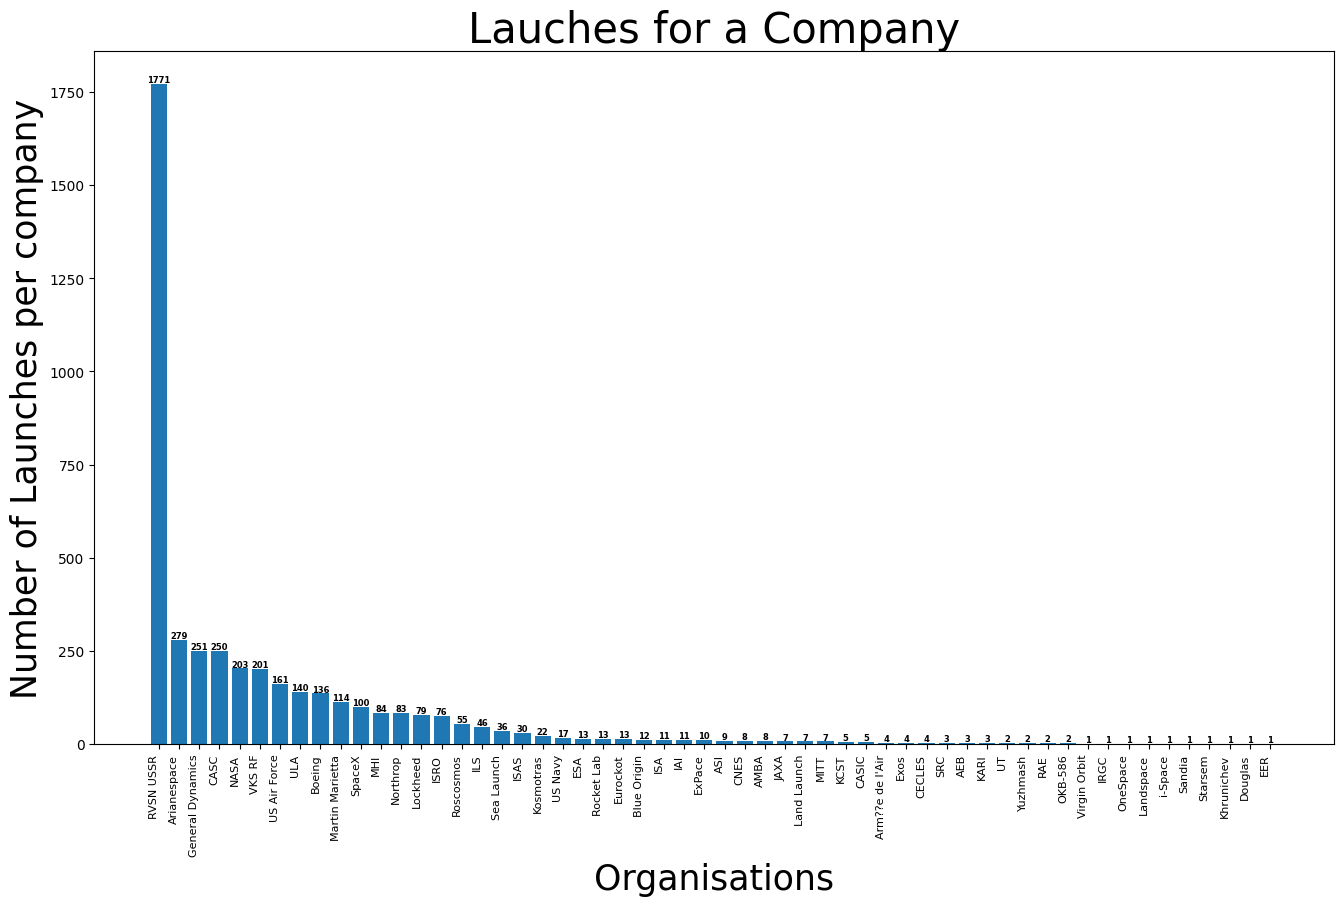

In [25]:
mplt.figure(figsize=(16,9))
mplt.ylabel("Number of Launches per company",fontsize=25)
mplt.xlabel("Organisations",fontsize=25)
mplt.title("Lauches for a Company",fontsize=30)
mplt.xticks(rotation=90, ha='right', fontsize=8)

for index,value in enumerate(launches_per_company):
    
    mplt.text(x=index, 
              y=value - 0.5,  # Slightly above the bar
              s=f'{value}',  # Convert the value to string
              ha='center',  # Center the text horizontally on the bar
              va='bottom',  # Position the text above the bar
              fontsize=6,  # Increase font size for better readability
              fontweight='bold')  # Make the font bold
mplt.tight_layout()    

mplt.bar(launches_per_company.index.values, launches_per_company.values)


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [26]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status  
0      StatusActive  50.00        Success  
1      StatusActive  29.75        Success  
2      StatusActive    NaN        Success  
3      StatusActive  65.00        Success  
4      StatusActive 145.00        Success  
...             ...    ...            ...  
4319  StatusRetired    NaN        Failure  
4320  StatusRetired    NaN        Success  
4321  StatusRetired    NaN        Failure  
4322  StatusRetired    NaN        Success  
4323  StatusRetired    NaN        Success  

[4312 rows x 7 columns]

In [27]:
rocket_status=df_data["Rocket_Status"].value_counts()
rocket_status

Rocket_Status
StatusRetired    3525
StatusActive      787
Name: count, dtype: int64

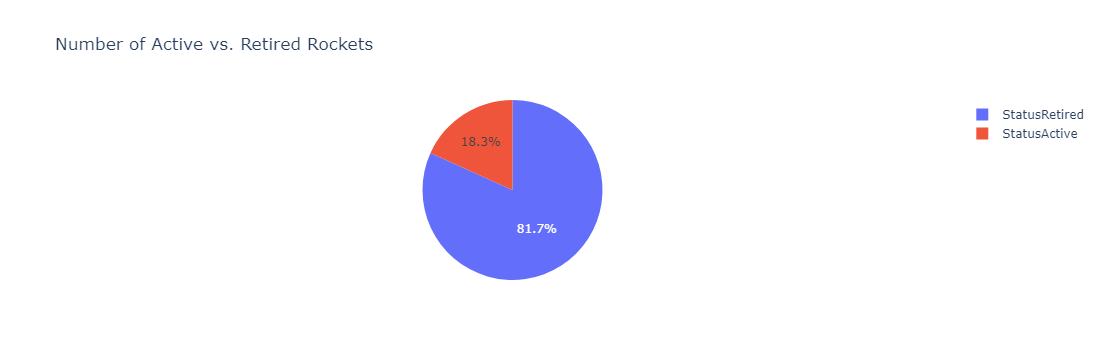

In [28]:
figure =px.pie(df_data,df_data["Rocket_Status"],title="Number of Active vs. Retired Rockets")
figure.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [29]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status  
0      StatusActive  50.00        Success  
1      StatusActive  29.75        Success  
2      StatusActive    NaN        Success  
3      StatusActive  65.00        Success  
4      StatusActive 145.00        Success  
...             ...    ...            ...  
4319  StatusRetired    NaN        Failure  
4320  StatusRetired    NaN        Success  
4321  StatusRetired    NaN        Failure  
4322  StatusRetired    NaN        Success  
4323  StatusRetired    NaN        Success  

[4312 rows x 7 columns]

In [30]:
mission_status=df_data["Mission_Status"].value_counts()
print(mission_status)

Mission_Status
Success              3872
Failure               334
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


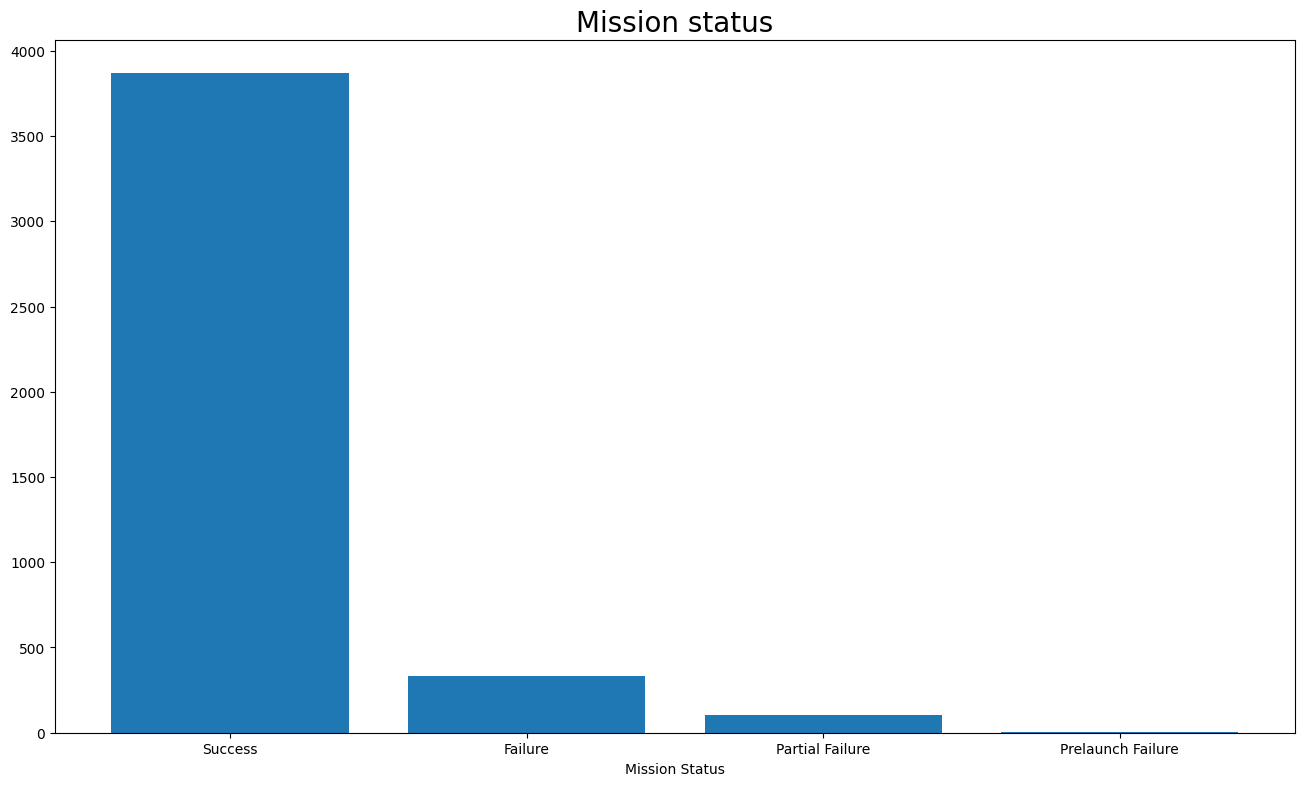

In [31]:
mplt.figure(figsize=(16,9))
mplt.title("Mission status",fontsize=20)
mplt.xlabel("Mission Status")
mplt.bar(mission_status.index,mission_status.values)

mplt.show()

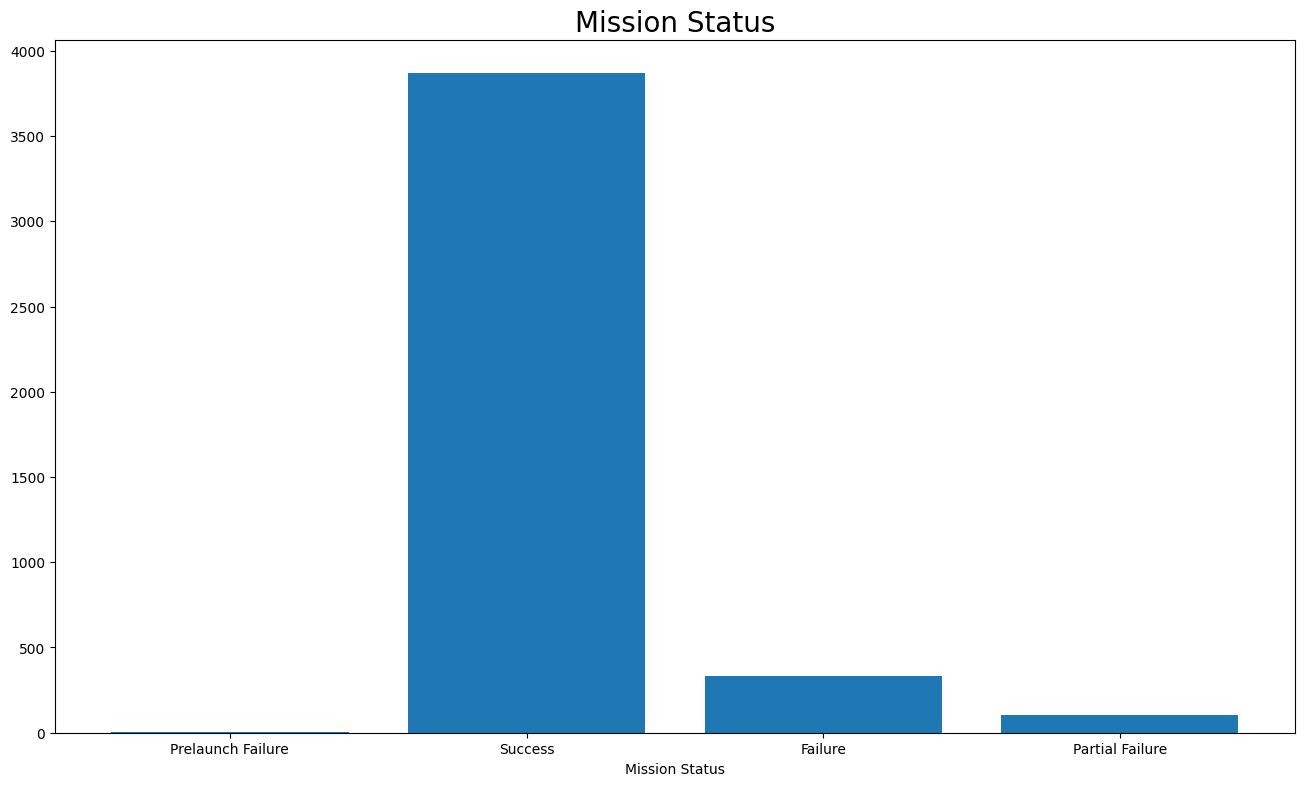

In [32]:
import matplotlib.pyplot as mplt

# Assuming `mission_status` is a pandas Series, reorder the data in a mixed order
# Here, for demonstration, we'll just shuffle the values randomly or specify a custom order
mixed_order = ['Prelaunch Failure', 'Success','Failure', 'Partial Failure' ]  # Example of mixed order

# Reindex the mission_status Series based on this custom mixed order
mission_status = mission_status.reindex(mixed_order)

# Step 1: Create a figure and plot
mplt.figure(figsize=(16,9))
mplt.title("Mission Status", fontsize=20)
mplt.xlabel("Mission Status")

# Step 2: Plot in the mixed order
mplt.bar(mission_status.index, mission_status.values)

# Step 3: Show the plot
mplt.show()


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [33]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status  
0      StatusActive  50.00        Success  
1      StatusActive  29.75        Success  
2      StatusActive    NaN        Success  
3      StatusActive  65.00        Success  
4      StatusActive 145.00        Success  
...             ...    ...            ...  
4319  StatusRetired    NaN        Failure  
4320  StatusRetired    NaN        Success  
4321  StatusRetired    NaN        Failure  
4322  StatusRetired    NaN        Success  
4323  StatusRetired    NaN        Success  

[4312 rows x 7 columns]

In [34]:
prices = df_data["Price"].dropna()

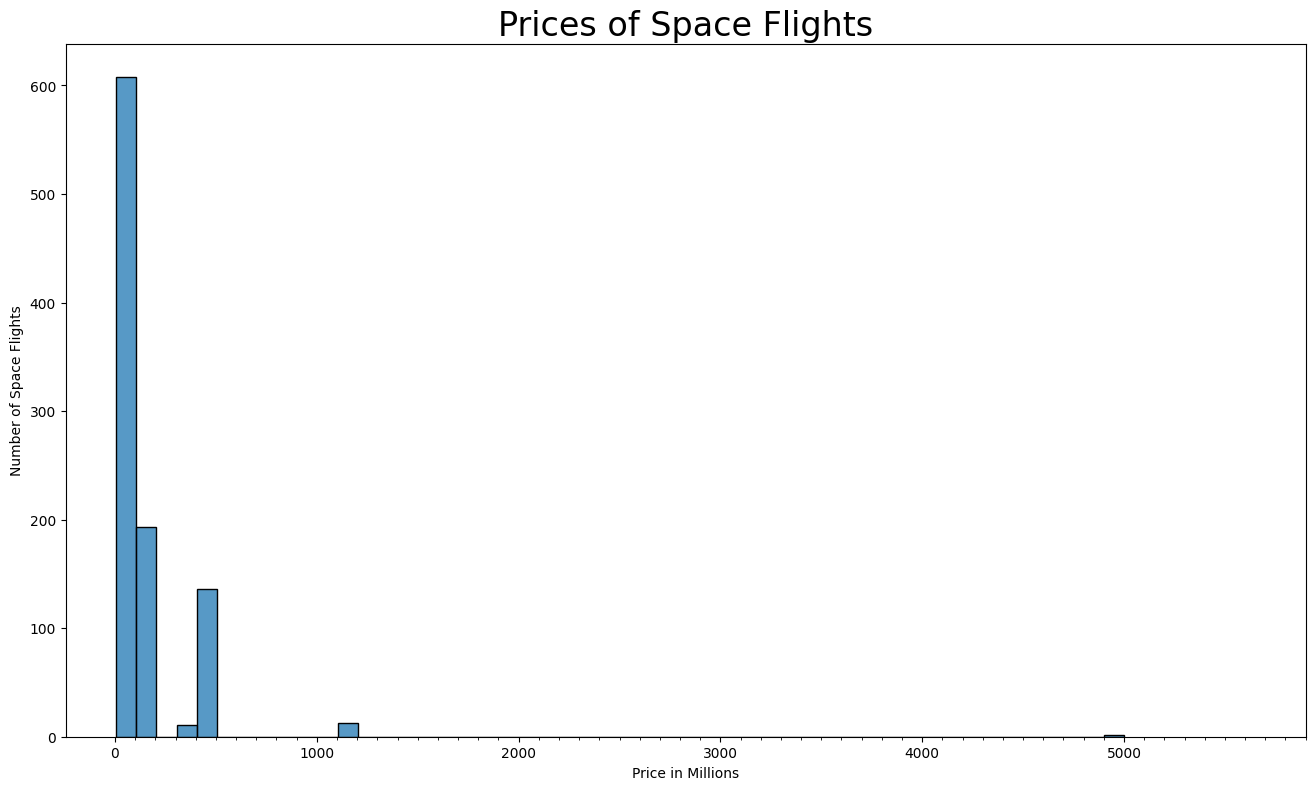

In [35]:

mplt.figure(figsize=(16, 9))
sns.histplot(
    x=prices.values,
    bins=50,
)

mplt.title("Prices of Space Flights", fontsize=24)
mplt.xlabel("Price in Millions")
mplt.ylabel("Number of Space Flights")

# draw ticks for better visualization
major_ticks = [n * 1000 for n in range(6)]
minor_ticks = [n * 100 for n in range(60)]

mplt.xticks(major_ticks)
mplt.gca().set_xticks(minor_ticks, minor=True)

mplt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [36]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status  
0      StatusActive  50.00        Success  
1      StatusActive  29.75        Success  
2      StatusActive    NaN        Success  
3      StatusActive  65.00        Success  
4      StatusActive 145.00        Success  
...             ...    ...            ...  
4319  StatusRetired    NaN        Failure  
4320  StatusRetired    NaN        Success  
4321  StatusRetired    NaN        Failure  
4322  StatusRetired    NaN        Success  
4323  StatusRetired    NaN        Success  

[4312 rows x 7 columns]

In [37]:
df_data["ISO_code"]=df_data["Location"].str.split(", ").str[-1]

In [38]:
country_name_mapping={
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran, Islamic Republic of',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
    # There were are additional places you have to account for
    'Iran' : 'Iran, Islamic Republic of',
    'South Korea' : 'Korea, Republic of',
    'North Korea' : 'Korea, Democratic People\'s Republic of',
    'Pacific Ocean' : 'Kiribati'
    
}

In [39]:
df_data["ISO_code"]=df_data["ISO_code"].replace(country_name_mapping)

In [40]:
df_data["ISO_code"]

0              USA
1            China
2              USA
3       Kazakhstan
4              USA
           ...    
4319           USA
4320           USA
4321           USA
4322    Kazakhstan
4323    Kazakhstan
Name: ISO_code, Length: 4312, dtype: object

In [41]:
df_data["ISO_code"]= df_data["ISO_code"].apply(lambda x:countries.get(x).alpha3)

In [42]:
df_data["ISO_code"]

0       USA
1       CHN
2       USA
3       KAZ
4       USA
       ... 
4319    USA
4320    USA
4321    USA
4322    KAZ
4323    KAZ
Name: ISO_code, Length: 4312, dtype: object

In [43]:
df_countries=df_data["ISO_code"].value_counts()

In [44]:
df_countries

ISO_code
RUS    1392
USA    1351
KAZ     701
FRA     303
CHN     268
JPN     123
IND      76
KIR      36
NZL      13
IRN      12
ISR      11
KEN       9
AUS       6
PRK       5
BRA       3
KOR       3
Name: count, dtype: int64

In [45]:
world_map = px.choropleth(
    df_countries,
    locations=df_countries.index,
    color=df_countries.values,
    hover_name=df_countries.index,
    color_continuous_scale=px.colors.sequential.YlOrRd  # Correct spelling here
)


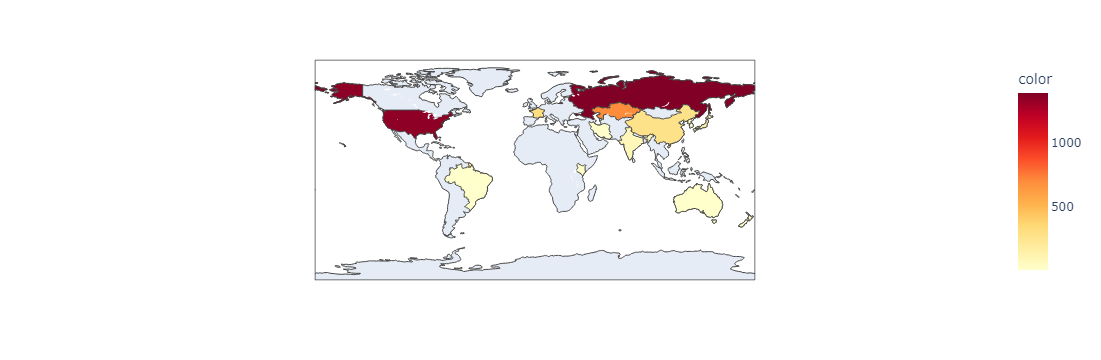

In [46]:
world_map.update_layout(coloraxis_showscale=True)

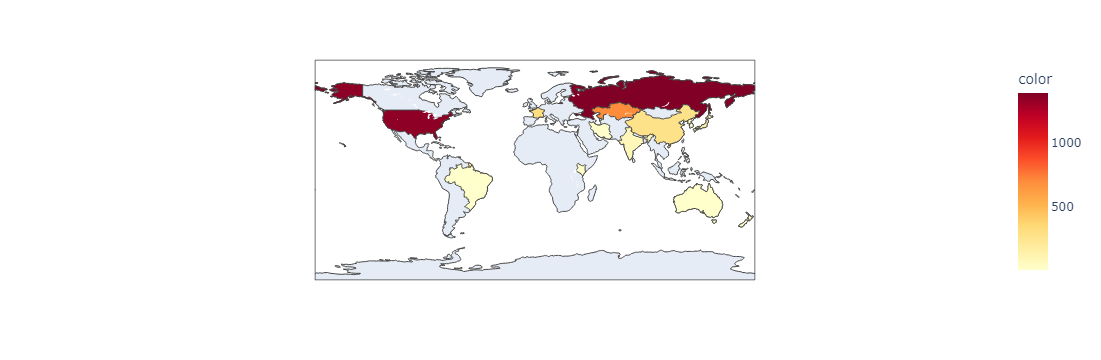

In [47]:
world_map.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [48]:
df_mission_failure=df_data.query("Mission_Status =='Failure'")['ISO_code'].value_counts()
df_mission_failure

ISO_code
USA    129
KAZ     72
RUS     63
CHN     19
FRA     13
IND      8
JPN      7
IRN      6
AUS      3
KIR      3
PRK      3
NZL      2
KOR      2
ISR      2
BRA      2
Name: count, dtype: int64

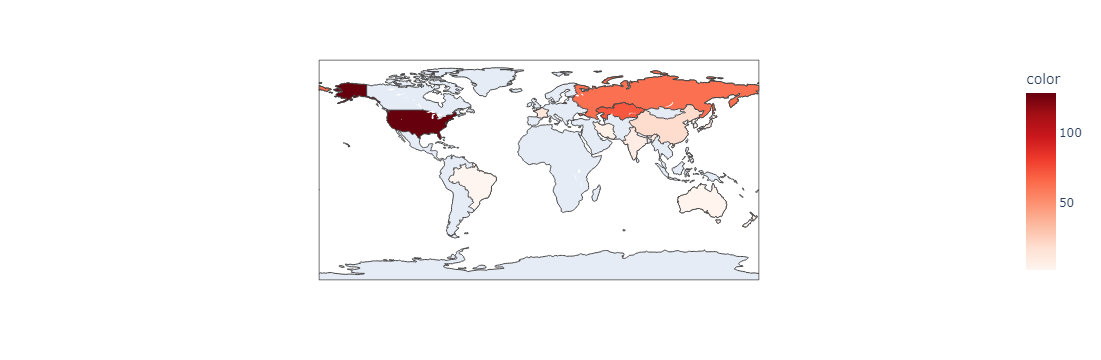

In [49]:
world_map = px.choropleth(df_mission_failure,
                          locations=df_mission_failure.index,
                          color=df_mission_failure.values, 
                          hover_name=df_mission_failure.index, 
                          color_continuous_scale=px.colors.sequential.Reds)
 
world_map.update_layout(coloraxis_showscale=True)
 
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [50]:
df_burst=df_data.groupby(by=['ISO_code','Organisation', 'Mission_Status'],as_index=False).agg({'Detail':pd.Series.count})

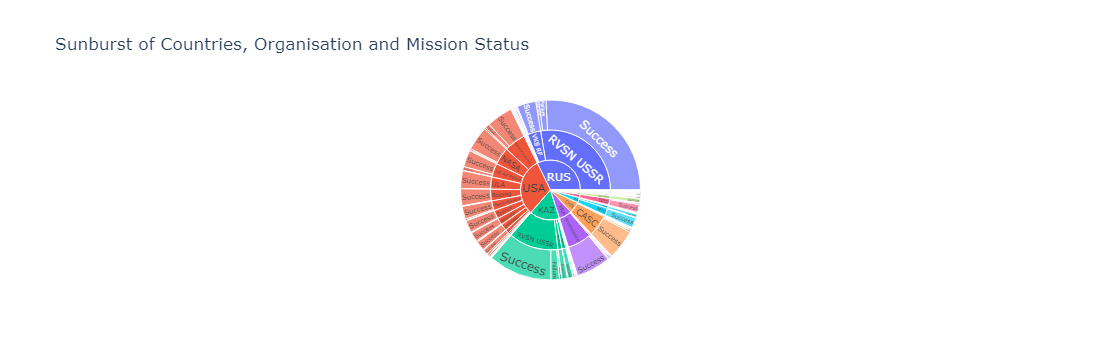

In [51]:
burst = px.sunburst(df_burst, 
                    path=['ISO_code', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Sunburst of Countries, Organisation and Mission Status',
                    
                   )
 
burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [52]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                 Date                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status ISO_code  
0  StatusActive  50.00        Success      USA  
1  StatusActive  29.75        Success      CHN  
2  StatusActive    NaN        Success      USA  
3  StatusActive  65.00        Success      KAZ  
4  StatusActive 145.00        Success      USA

In [53]:
df_money_spent_org=df_data[['Organisation','Price']].dropna()
df_money_spent_org=df_money_spent_org.groupby(by=["Organisation"],as_index=False).agg({'Price':pd.Series.sum})
df_money_spent_org

Organisation     Price
0       Arianespace 16,345.00
1            Boeing  1,241.00
2              CASC  6,310.51
3               EER     20.00
4               ESA     37.00
5          Eurockot    543.40
6            ExPace     28.30
7               ILS  1,320.00
8              ISRO  2,177.00
9              JAXA    168.00
10        Kosmotras    638.00
11         Lockheed    280.00
12              MHI  3,532.50
13  Martin Marietta    721.40
14             NASA 76,280.00
15         Northrop  3,930.00
16        RVSN USSR 10,000.00
17       Rocket Lab     97.50
18        Roscosmos  1,187.50
19           Sandia     15.00
20           SpaceX  5,444.00
21              ULA 14,798.00
22     US Air Force  1,550.92
23           VKS RF  1,548.90
24     Virgin Orbit     12.00

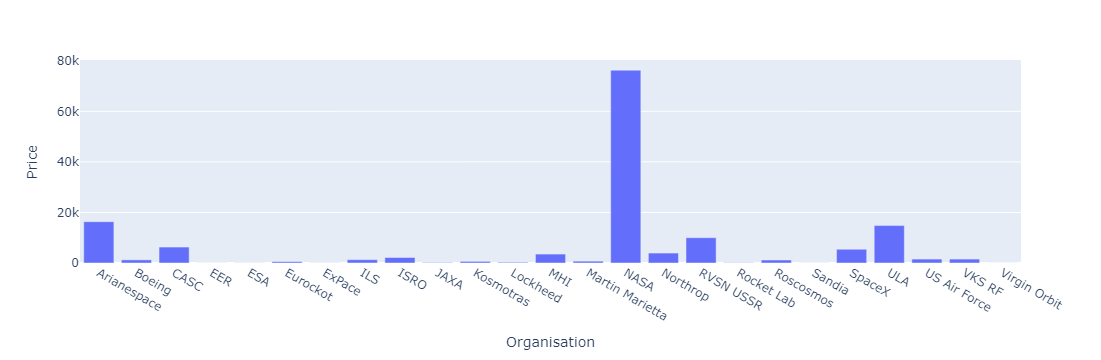

In [54]:
fig=px.bar(df_money_spent_org,df_money_spent_org["Organisation"],df_money_spent_org["Price"])
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [55]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                 Date                                        Detail  \
0 2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1 2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2 2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3 2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4 2020-07-30 11:50:00                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status ISO_code  
0  StatusActive  50.00        Success      USA  
1  StatusActive  29.75        Success      CHN  
2  StatusActive    NaN        Success      USA  
3  StatusActive  65.00        Success      KAZ  
4  StatusActive 145.00        Success      USA

In [56]:
df_money_spent_by_org_per_launch=df_data[['Organisation','Price']].dropna()

In [57]:
df_money_spent_by_org_per_launch['No of Launches']=df_money_spent_by_org_per_launch['Organisation']

In [58]:
df_money_spent_by_org_per_launch=df_money_spent_by_org_per_launch.groupby(by=['Organisation'],as_index=False).agg({"Price" : pd.Series.sum, "No of Launches" : pd.Series.count})

In [59]:
df_money_spent_by_org_per_launch

Organisation     Price  No of Launches
0       Arianespace 16,345.00              96
1            Boeing  1,241.00               7
2              CASC  6,310.51             157
3               EER     20.00               1
4               ESA     37.00               1
5          Eurockot    543.40              13
6            ExPace     28.30               1
7               ILS  1,320.00              13
8              ISRO  2,177.00              67
9              JAXA    168.00               3
10        Kosmotras    638.00              22
11         Lockheed    280.00               8
12              MHI  3,532.50              37
13  Martin Marietta    721.40               9
14             NASA 76,280.00             149
15         Northrop  3,930.00              83
16        RVSN USSR 10,000.00               2
17       Rocket Lab     97.50              13
18        Roscosmos  1,187.50              23
19           Sandia     15.00               1
20           SpaceX  5,444.00              99
21              ULA 14,798.00              98
22     US Air Force  1,550.92              26
23           VKS RF  1,548.90              33
24     Virgin Orbit     12.00               1

In [60]:
df_money_spent_by_org_per_launch['Per Launch']= df_money_spent_by_org_per_launch["Price"] / df_money_spent_by_org_per_launch["No of Launches"]

In [61]:
df_money_spent_by_org_per_launch

Organisation     Price  No of Launches  Per Launch
0       Arianespace 16,345.00              96      170.26
1            Boeing  1,241.00               7      177.29
2              CASC  6,310.51             157       40.19
3               EER     20.00               1       20.00
4               ESA     37.00               1       37.00
5          Eurockot    543.40              13       41.80
6            ExPace     28.30               1       28.30
7               ILS  1,320.00              13      101.54
8              ISRO  2,177.00              67       32.49
9              JAXA    168.00               3       56.00
10        Kosmotras    638.00              22       29.00
11         Lockheed    280.00               8       35.00
12              MHI  3,532.50              37       95.47
13  Martin Marietta    721.40               9       80.16
14             NASA 76,280.00             149      511.95
15         Northrop  3,930.00              83       47.35
16        RVSN USSR 10,000.00               2    5,000.00
17       Rocket Lab     97.50              13        7.50
18        Roscosmos  1,187.50              23       51.63
19           Sandia     15.00               1       15.00
20           SpaceX  5,444.00              99       54.99
21              ULA 14,798.00              98      151.00
22     US Air Force  1,550.92              26       59.65
23           VKS RF  1,548.90              33       46.94
24     Virgin Orbit     12.00               1       12.00

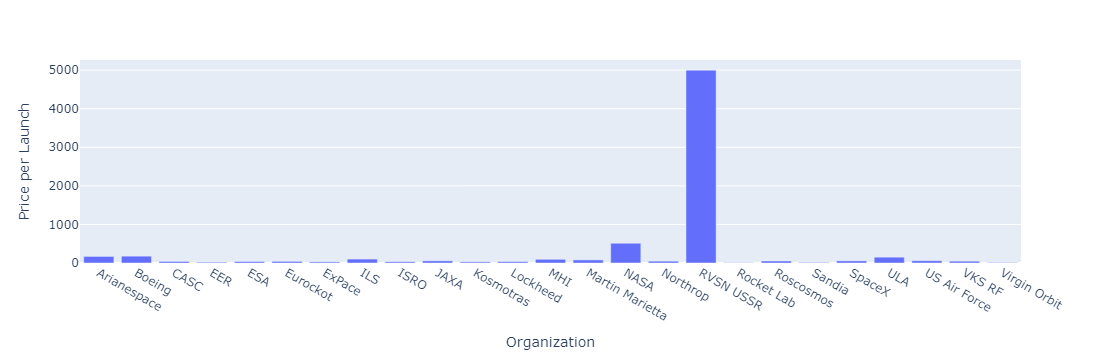

In [62]:
fig = px.bar(df_money_spent_by_org_per_launch,
             df_money_spent_by_org_per_launch["Organisation"],
             df_money_spent_by_org_per_launch["Per Launch"])

fig.update_layout(
    xaxis_title='Organization',
    yaxis_title='Price per Launch'
)

fig.show()

 # Chart the Number of Launches per Year


In [63]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4312 rows x 8 columns]

In [64]:
no_of_launches_per_year=df_data['Date'].dropna()
no_of_launches_per_year

0      2020-08-07 05:12:00
1      2020-08-06 04:01:00
2      2020-08-04 23:57:00
3      2020-07-30 21:25:00
4      2020-07-30 11:50:00
               ...        
4319   1958-02-05 07:33:00
4320   1958-02-01 03:48:00
4321   1957-12-06 16:44:00
4322   1957-11-03 02:30:00
4323   1957-10-04 19:28:00
Name: Date, Length: 4197, dtype: datetime64[ns]

In [65]:
no_of_launches_per_year_1=no_of_launches_per_year.dt.year.value_counts().sort_index(ascending=True)

In [66]:
no_of_launches_per_year_1

Date
1957      3
1958     22
1959     20
1960     38
1961     52
       ... 
2016     88
2017     90
2018    117
2019    107
2020     63
Name: count, Length: 64, dtype: int64

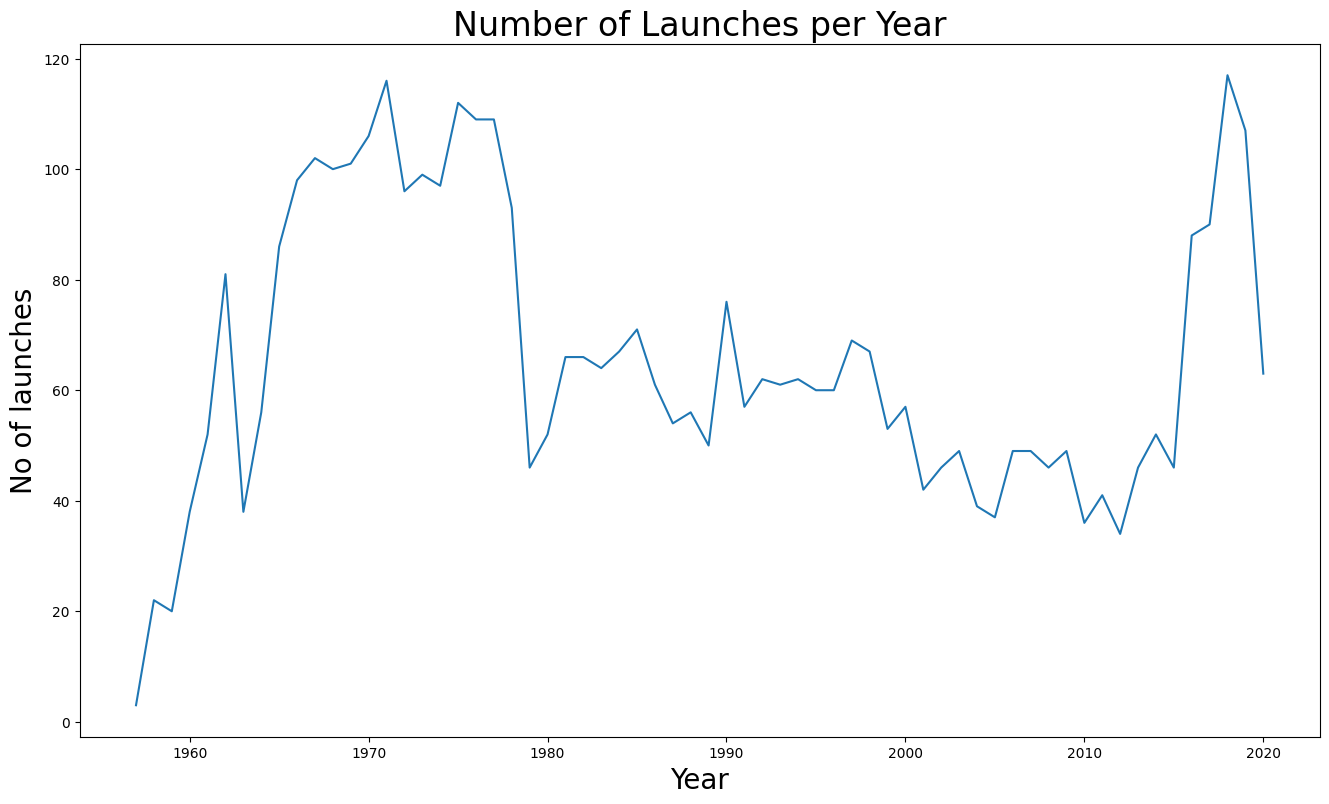

In [67]:
mplt.figure(figsize=(16, 9))

mplt.xlabel("Year", fontsize=20)
mplt.ylabel("No of launches", fontsize=20)

mplt.title("Number of Launches per Year", fontsize=24)
mplt.plot(no_of_launches_per_year_1.index, no_of_launches_per_year_1.values)

mplt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [92]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4312 rows x 8 columns]

In [93]:
df_data1=df_data

In [94]:
df_data1

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4312 rows x 8 columns]

In [95]:
df_data1 = df_data1.dropna(subset=['Date'])


In [96]:
df_data1

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4197 rows x 8 columns]

In [97]:
df_data1['Date'] = pd.to_datetime(df_data1['Date'], errors='coerce')

C:\Users\moham\AppData\Local\Temp\ipykernel_12652\237962878.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
df_data1['YearMonth'] = df_data1['Date'].dt.to_period('M')

C:\Users\moham\AppData\Local\Temp\ipykernel_12652\613687392.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [99]:
df_data1

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code YearMonth  
0      StatusActive  50.00        Success      USA   2020-08  
1      StatusActive  29.75        Success      CHN   2020-08  
2      StatusActive    NaN        Success      USA   2020-08  
3      StatusActive  65.00        Success      KAZ   2020-07  
4      StatusActive 145.00        Success      USA   2020-07  
...             ...    ...            ...      ...       ...  
4319  StatusRetired    NaN        Failure      USA   1958-02  
4320  StatusRetired    NaN        Success      USA   1958-02  
4321  StatusRetired    NaN        Failure      USA   1957-12  
4322  StatusRetired    NaN        Success      KAZ   1957-11  
4323  StatusRetired    NaN        Success      KAZ   1957-10  

[4197 rows x 9 columns]

In [100]:
df_monthtomonth = df_data1.groupby('YearMonth').size().reset_index(name='Launch_Count')

In [101]:
df_monthtomonth

YearMonth  Launch_Count
0     1957-10             1
1     1957-11             1
2     1957-12             1
3     1958-02             2
4     1958-03             3
..        ...           ...
742   2020-04             5
743   2020-05             9
744   2020-06             7
745   2020-07            14
746   2020-08             3

[747 rows x 2 columns]

In [103]:
maxlaunchrow = df_monthtomonth['Launch_Count'].idxmax()
maxlaunchmonth = df_monthtomonth.loc[maxlaunchrow, 'YearMonth']
maxlaunchcount = df_monthtomonth.loc[maxlaunchrow, 'Launch_Count']

print(f"The year-month with the maximum launches is {maxlaunchmonth} with {maxlaunchcount} launches.")



The year-month with the maximum launches is 1968-04 with 16 launches.


In [112]:
#rolling(window=3): This creates a rolling window of size 3, meaning it calculates the average of the current month and the two previous months.

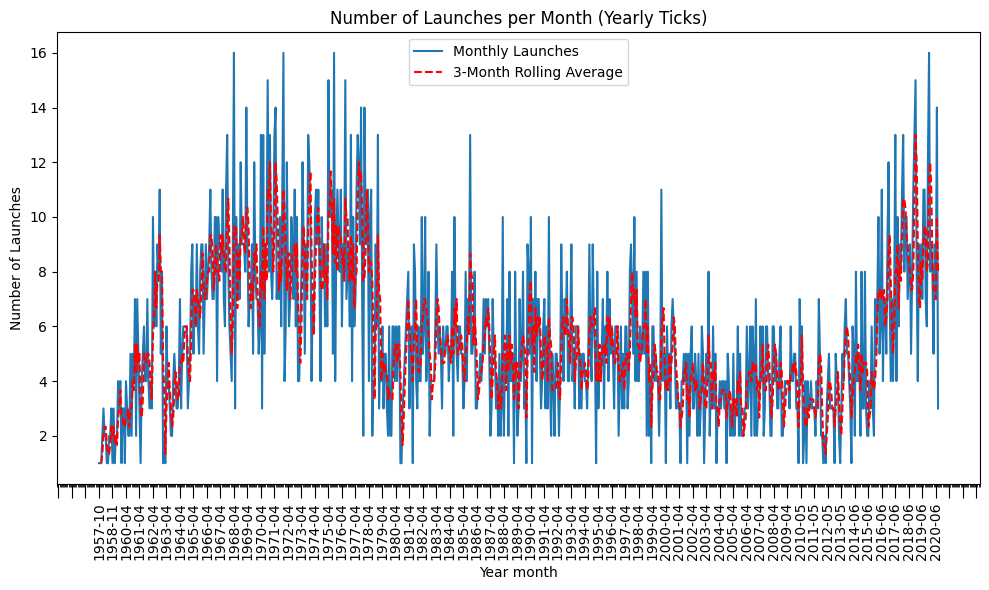

In [115]:
import matplotlib.ticker as ticker

mplt.figure(figsize=(10,6))
mplt.plot(df_monthtomonth['YearMonth'].astype(str), df_monthtomonth['Launch_Count'], label='Monthly Launches')

df_monthtomonth['Rolling_Avg'] = df_monthtomonth['Launch_Count'].rolling(window=3).mean()
mplt.plot(df_monthtomonth['YearMonth'].astype(str), df_monthtomonth['Rolling_Avg'], label='3-Month Rolling Average', color='red', linestyle='--')

ax = mplt.gca()  # Get current axis
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))  # Set major ticks every 12 months (1 year)
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(12))  # Set minor ticks every month (12 minor ticks in a year)
ax.tick_params(axis='x', which='major', length=10) # increases length of major ticks

mplt.xticks(rotation=90)
mplt.xlabel('Year month')
mplt.ylabel('Number of Launches')
mplt.title('Number of Launches per Month (Yearly Ticks)')
mplt.legend()
mplt.tight_layout()
mplt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [159]:
df_data2=df_data

In [160]:
df_data2 = df_data2.dropna(subset=['Date'])

In [161]:
df_data2['Date'] = pd.to_datetime(df_data2['Date'])

C:\Users\moham\AppData\Local\Temp\ipykernel_12652\1740539185.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
df_data2

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4197 rows x 8 columns]

In [163]:
df_data2['Month'] = df_data2['Date'].dt.month

C:\Users\moham\AppData\Local\Temp\ipykernel_12652\1151218897.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
df_data2

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  Month  
0      StatusActive  50.00        Success      USA      8  
1      StatusActive  29.75        Success      CHN      8  
2      StatusActive    NaN        Success      USA      8  
3      StatusActive  65.00        Success      KAZ      7  
4      StatusActive 145.00        Success      USA      7  
...             ...    ...            ...      ...    ...  
4319  StatusRetired    NaN        Failure      USA      2  
4320  StatusRetired    NaN        Success      USA      2  
4321  StatusRetired    NaN        Failure      USA     12  
4322  StatusRetired    NaN        Success      KAZ     11  
4323  StatusRetired    NaN        Success      KAZ     10  

[4197 rows x 9 columns]

In [165]:
launches_by_month = df_data2.groupby('Month').size().reset_index(name='Launches')

In [166]:
launches_by_month_sorted = launches_by_month.sort_values(by='Launches', ascending=False)


In [167]:
launches_by_month_sorted

Month  Launches
11     12       430
5       6       386
9      10       375
3       4       366
7       8       358
8       9       354
2       3       349
6       7       347
10     11       324
1       2       323
4       5       320
0       1       265

In [168]:
launches_by_month_sorted.iloc[0] #most popular month

Month        12
Launches    430
Name: 11, dtype: int64

In [169]:
launches_by_month_sorted.iloc[11] #least popular month

Month         1
Launches    265
Name: 0, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [175]:
average_launch_price=df_data.dropna()
average_launch_price=average_launch_price.groupby(df_data['Date'].dt.year)['Price'].mean()
average_launch_price.index = average_launch_price.index.astype(int)

In [176]:
average_launch_price

Date
1964      63.23
1965      63.23
1966      59.00
1967     216.29
1968     279.20
1969     609.50
1970   1,160.00
1971   1,160.00
1972   1,160.00
1973   1,160.00
1981     450.00
1982     345.20
1983     366.16
1984     380.13
1985     408.08
1986     310.27
1987   1,687.20
1988   1,193.16
1989     380.83
1990     289.15
1991     391.43
1992     319.35
1993     276.73
1994     221.51
1995     325.00
1996     243.20
1997     221.74
1998     152.12
1999     136.17
2000     173.12
2001     290.70
2002     195.37
2003      80.51
2004      92.74
2005      95.79
2006     138.61
2007     125.70
2008     133.45
2009     180.29
2010     148.40
2011     146.60
2012     126.10
2013      90.55
2014     102.55
2015      95.95
2016      79.46
2017      69.49
2018      64.75
2019      59.61
2020      56.65
Name: Price, dtype: float64

In [177]:
average_launch_price.reset_index(name='Avg Price')

Date  Avg Price
0   1964      63.23
1   1965      63.23
2   1966      59.00
3   1967     216.29
4   1968     279.20
5   1969     609.50
6   1970   1,160.00
7   1971   1,160.00
8   1972   1,160.00
9   1973   1,160.00
10  1981     450.00
11  1982     345.20
12  1983     366.16
13  1984     380.13
14  1985     408.08
15  1986     310.27
16  1987   1,687.20
17  1988   1,193.16
18  1989     380.83
19  1990     289.15
20  1991     391.43
21  1992     319.35
22  1993     276.73
23  1994     221.51
24  1995     325.00
25  1996     243.20
26  1997     221.74
27  1998     152.12
28  1999     136.17
29  2000     173.12
30  2001     290.70
31  2002     195.37
32  2003      80.51
33  2004      92.74
34  2005      95.79
35  2006     138.61
36  2007     125.70
37  2008     133.45
38  2009     180.29
39  2010     148.40
40  2011     146.60
41  2012     126.10
42  2013      90.55
43  2014     102.55
44  2015      95.95
45  2016      79.46
46  2017      69.49
47  2018      64.75
48  2019      59.61
49  2020      56.65

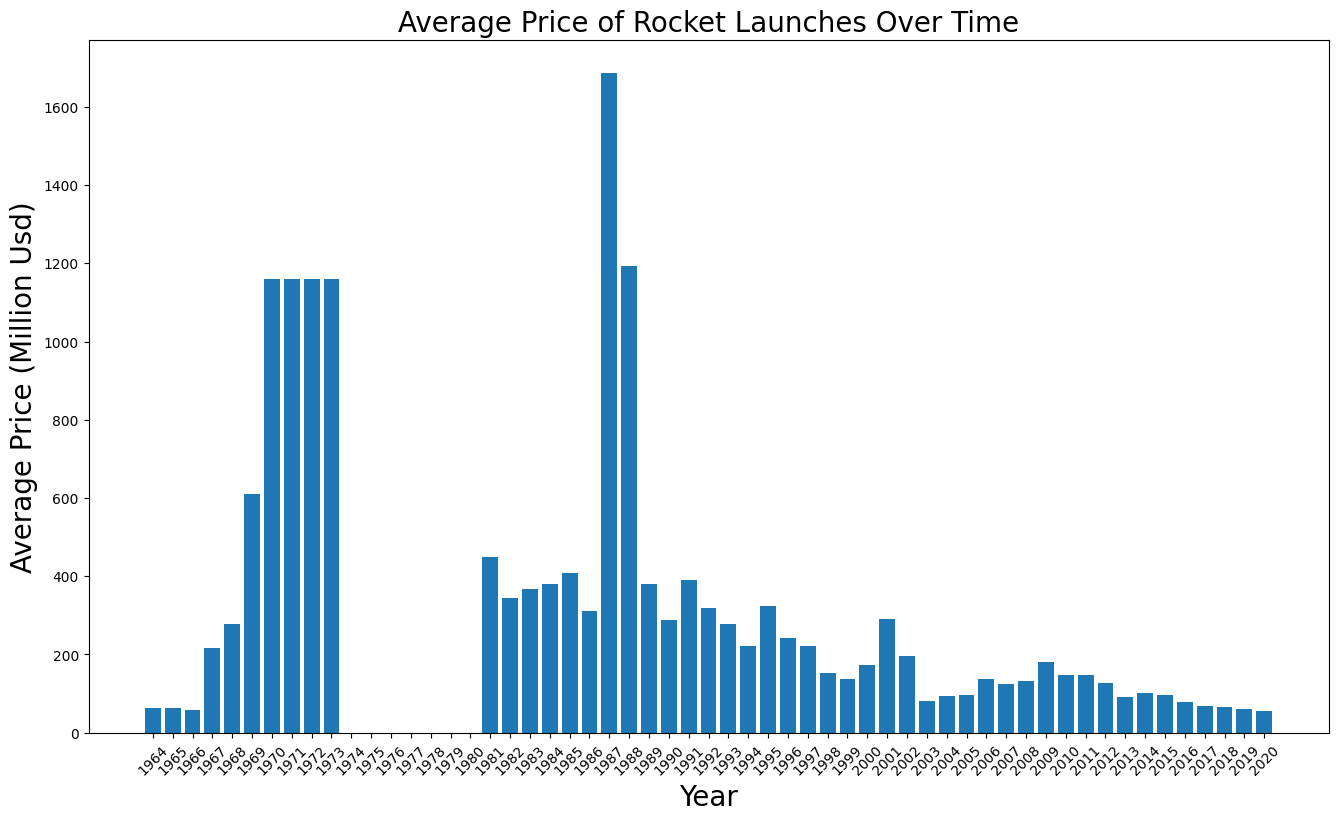

In [179]:
mplt.figure(figsize=(16,9))
mplt.xlabel('Year', fontsize=20)
mplt.ylabel('Average Price (Million Usd)', fontsize=20)
mplt.title('Average Price of Rocket Launches Over Time', fontsize=20)

mplt.bar(average_launch_price.index, average_launch_price.values)
mplt.xticks(range(average_launch_price.index.min(), average_launch_price.index.max()+ 1), rotation=45)

mplt.show()


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [234]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4312 rows x 8 columns]

In [235]:
df_data3=df_data
df_data3

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4312 rows x 8 columns]

In [236]:
df_data3 = df_data3.dropna(subset=['Date'])

In [237]:
df_data3

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4197 rows x 8 columns]

In [238]:
org_launches_per_year =df_data3.copy()[["Organisation", "Date"]]
org_launches_per_year

Organisation                Date
0          SpaceX 2020-08-07 05:12:00
1            CASC 2020-08-06 04:01:00
2          SpaceX 2020-08-04 23:57:00
3       Roscosmos 2020-07-30 21:25:00
4             ULA 2020-07-30 11:50:00
...           ...                 ...
4319      US Navy 1958-02-05 07:33:00
4320         AMBA 1958-02-01 03:48:00
4321      US Navy 1957-12-06 16:44:00
4322    RVSN USSR 1957-11-03 02:30:00
4323    RVSN USSR 1957-10-04 19:28:00

[4197 rows x 2 columns]

In [239]:
org_launches_per_year["Date"]=org_launches_per_year["Date"].dt.year.astype(int)


In [240]:
org_launches_per_year

Organisation  Date
0          SpaceX  2020
1            CASC  2020
2          SpaceX  2020
3       Roscosmos  2020
4             ULA  2020
...           ...   ...
4319      US Navy  1958
4320         AMBA  1958
4321      US Navy  1957
4322    RVSN USSR  1957
4323    RVSN USSR  1957

[4197 rows x 2 columns]

In [241]:
org_launches_per_year = org_launches_per_year.groupby(["Organisation", "Date"]).agg(Total_Launches=("Organisation", "count")).reset_index()
# if you see ASI has 3 rows based on each year here group by is done using two columns  # agg new column named total launches
# based on organisational count for that time frame is calculated and gets the value of how many times it has been in the time  frame 
#ASI 1967 1 ASI 1970 1 and so on

#mean( instead of count) is not a valid aggregation operation for categorical or string columns here organisation is string mean is for numerical data
org_launches_per_year

Organisation  Date  Total_Launches
0             AEB  1999               1
1            AMBA  1958               7
2             ASI  1967               1
3             ASI  1970               1
4             ASI  1971               2
..            ...   ...             ...
627        VKS RF  2020               3
628  Virgin Orbit  2020               1
629      Yuzhmash  1969               1
630      Yuzhmash  1991               1
631       i-Space  2019               1

[632 rows x 3 columns]

In [242]:
top_10 = org_launches_per_year.groupby("Organisation").agg({"Total_Launches" : pd.Series.count}).sort_values("Total_Launches", ascending=False).head(10).reset_index()
#pd.Series.count only counts non-null values, so if there are any missing values in Total_Launches, they won’t be included in the count.
# The .agg() function applies an aggregation to the grouped data here.
#So, this is counting how many times each organization appears in the Total_Launches column 
#(which corresponds to the number of launches recorded for each organization).
top_10

Organisation  Total_Launches
0              CASC              46
1              NASA              46
2               MHI              42
3         RVSN USSR              39
4  General Dynamics              37
5       Arianespace              37
6              ISRO              31
7   Martin Marietta              30
8          Northrop              29
9            VKS RF              29

In [243]:
org_launches_per_year=org_launches_per_year.query("Organisation in @top_10['Organisation']")
#uses the query() method to filter rows in the org_launches_per_year DataFrame based on whether the "Organisation" is in the list of top 10 organizations
#from the top_10 DataFrame.
org_launches_per_year

Organisation  Date  Total_Launches
9    Arianespace  1984               3
10   Arianespace  1985               4
11   Arianespace  1986               3
12   Arianespace  1987               2
13   Arianespace  1988               6
..           ...   ...             ...
623       VKS RF  2016               4
624       VKS RF  2017               6
625       VKS RF  2018               5
626       VKS RF  2019               8
627       VKS RF  2020               3

[366 rows x 3 columns]

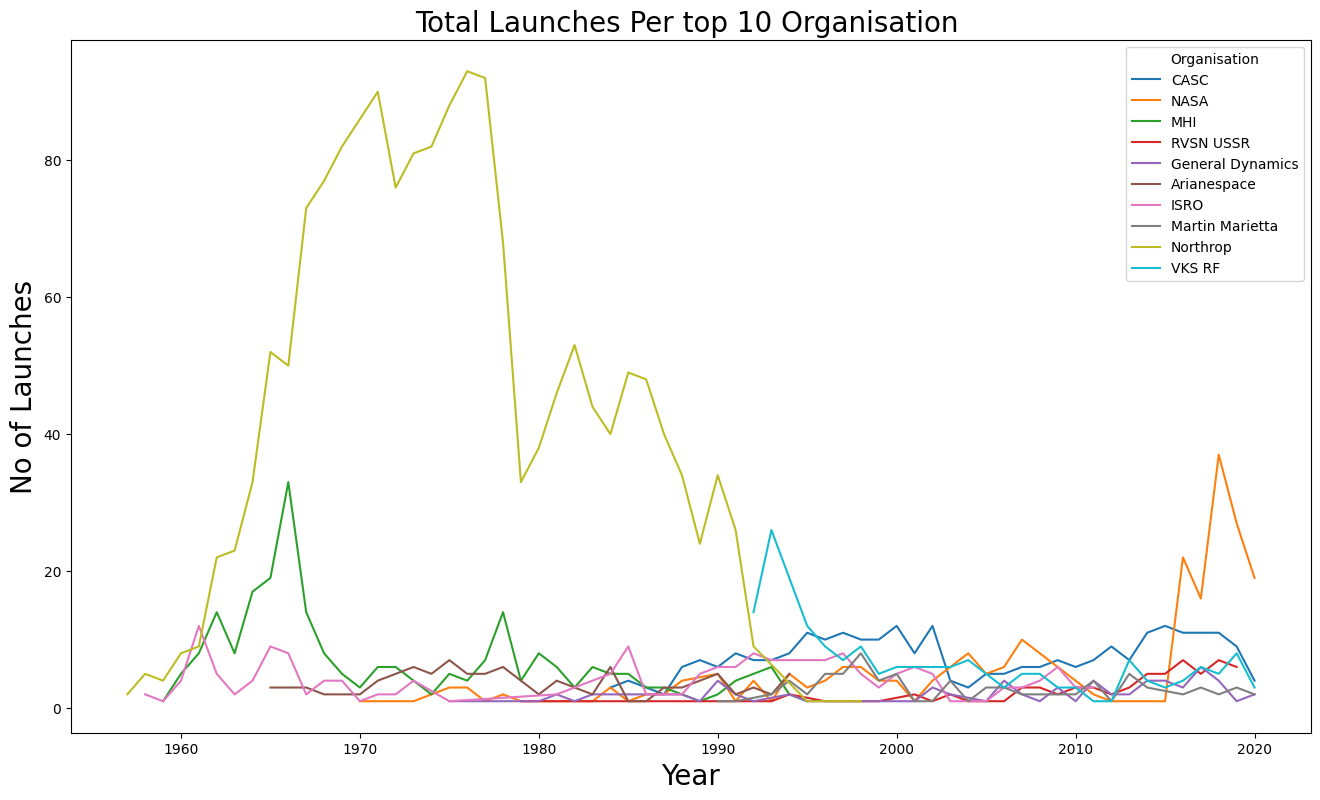

In [244]:
mplt.figure(figsize=(16,9))
mplt.title('Total Launches Per top 10 Organisation ', fontsize=20)
mplt.xlabel('Year', fontsize=20)
mplt.ylabel('No of Launches', fontsize=20)

for org in org_launches_per_year['Organisation'].unique():
    org_data = org_launches_per_year[org_launches_per_year["Organisation"] == org]
    mplt.plot(org_data['Date'], org_data['Total_Launches'])

mplt.legend(top_10["Organisation"], title='Organisation')   
mplt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [245]:
df_data["ISO_code"].unique()

array(['USA', 'CHN', 'KAZ', 'JPN', 'ISR', 'NZL', 'RUS', 'IRN', 'FRA',
       'IND', 'PRK', 'KIR', 'KOR', 'BRA', 'KEN', 'AUS'], dtype=object)

In [246]:
df_USA = df_data.query("ISO_code == 'USA' and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)
df_USA

Organisation                                    Location  \
4321           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4319           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
4318              AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4317           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
...                ...                                         ...   
1732              NASA  LC-39A, Kennedy Space Center, Florida, USA   
1726   Martin Marietta     SLC-4E, Vandenberg AFB, California, USA   
1724              NASA  LC-39A, Kennedy Space Center, Florida, USA   
1722  General Dynamics     SLC-3W, Vandenberg AFB, California, USA   
1721  General Dynamics   SLC-36B, Cape Canaveral AFS, Florida, USA   

                    Date                              Detail  Rocket_Status  \
4321 1957-12-06 16:44:00             Vanguard | Vanguard TV3  StatusRetired   
4320 1958-02-01 03:48:00                 Juno I | Explorer 1  StatusRetired   
4319 1958-02-05 07:33:00           Vanguard | Vanguard TV3BU  StatusRetired   
4318 1958-03-05 18:27:00                 Juno I | Explorer 2  StatusRetired   
4317 1958-03-17 12:15:00               Vanguard | Vanguard 1  StatusRetired   
...                  ...                                 ...            ...   
1732 1991-09-12 23:11:00    Space Shuttle Discovery | STS-48  StatusRetired   
1726 1991-11-08 07:07:00   Titan IV(403)A | SLDCOM & NOSS 3x  StatusRetired   
1724 1991-11-24 23:44:00     Space Shuttle Atlantis | STS-44  StatusRetired   
1722 1991-11-28 13:23:00  Atlas-E/F Star-37S-ISS | DMSP F-11  StatusRetired   
1721 1991-12-07 22:47:00             Atlas II | Eutelsat 2F3  StatusRetired   

      Price Mission_Status ISO_code  
4321    NaN        Failure      USA  
4320    NaN        Success      USA  
4319    NaN        Failure      USA  
4318    NaN        Failure      USA  
4317    NaN        Success      USA  
...     ...            ...      ...  
1732 450.00        Success      USA  
1726    NaN        Success      USA  
1724 450.00        Success      USA  
1722    NaN        Success      USA  
1721    NaN        Success      USA  

[644 rows x 8 columns]

In [247]:
df_USSR = df_data.query("(ISO_code == 'RUS' or ISO_code == 'KAZ') and Date < '1992-01-01 00:10:00'").sort_values("Date", ascending=True)
df_USSR

Organisation                                   Location  \
4323    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4315    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4313    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4301    RVSN USSR  Site 1/5, Baikonur Cosmodrome, Kazakhstan   
...           ...                                        ...   
1729    RVSN USSR     Site 32/2, Plesetsk Cosmodrome, Russia   
1728    RVSN USSR    Site 132/1, Plesetsk Cosmodrome, Russia   
1725    RVSN USSR     Site 32/1, Plesetsk Cosmodrome, Russia   
1723    RVSN USSR    Site 133/3, Plesetsk Cosmodrome, Russia   
1719     Yuzhmash     Site 32/2, Plesetsk Cosmodrome, Russia   

                    Date                                 Detail  \
4323 1957-10-04 19:28:00             Sputnik 8K71PS | Sputnik-1   
4322 1957-11-03 02:30:00             Sputnik 8K71PS | Sputnik-2   
4315 1958-04-27 09:01:00            Sputnik 8A91 | Sputnik-3 #1   
4313 1958-05-15 07:12:00            Sputnik 8A91 | Sputnik-3 #2   
4301 1958-09-23 07:40:00             Vostok | E-1 n†­1 (Luna-1)   
...                  ...                                    ...   
1729 1991-09-28 07:05:00        Tsyklon-3 | Cosmos 2157 to 2162   
1728 1991-10-10 14:00:00       Cosmos-3M (11K65M) | Cosmos 2164   
1725 1991-11-12 20:09:00        Tsyklon-3 | Cosmos 2165 to 2170   
1723 1991-11-27 03:30:00       Cosmos-3M (11K65M) | Cosmos 2173   
1719 1991-12-18 03:54:00  Tsyklon-3 | Intercosmos 25 & Magion 3   

      Rocket_Status  Price Mission_Status ISO_code  
4323  StatusRetired    NaN        Success      KAZ  
4322  StatusRetired    NaN        Success      KAZ  
4315  StatusRetired    NaN        Failure      KAZ  
4313  StatusRetired    NaN        Success      KAZ  
4301  StatusRetired    NaN        Failure      KAZ  
...             ...    ...            ...      ...  
1729  StatusRetired    NaN        Success      RUS  
1728  StatusRetired    NaN        Success      RUS  
1725  StatusRetired    NaN        Success      RUS  
1723  StatusRetired    NaN        Success      RUS  
1719  StatusRetired    NaN        Success      RUS  

[1709 rows x 8 columns]

In [248]:
df_cold_war = pd.concat([df_USA, df_USSR]).sort_values("Date", ascending=True)
df_cold_war

Organisation                                    Location  \
4323         RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4322         RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4321           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
4320              AMBA    LC-26A, Cape Canaveral AFS, Florida, USA   
4319           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
...                ...                                         ...   
1724              NASA  LC-39A, Kennedy Space Center, Florida, USA   
1723         RVSN USSR     Site 133/3, Plesetsk Cosmodrome, Russia   
1722  General Dynamics     SLC-3W, Vandenberg AFB, California, USA   
1721  General Dynamics   SLC-36B, Cape Canaveral AFS, Florida, USA   
1719          Yuzhmash      Site 32/2, Plesetsk Cosmodrome, Russia   

                    Date                                 Detail  \
4323 1957-10-04 19:28:00             Sputnik 8K71PS | Sputnik-1   
4322 1957-11-03 02:30:00             Sputnik 8K71PS | Sputnik-2   
4321 1957-12-06 16:44:00                Vanguard | Vanguard TV3   
4320 1958-02-01 03:48:00                    Juno I | Explorer 1   
4319 1958-02-05 07:33:00              Vanguard | Vanguard TV3BU   
...                  ...                                    ...   
1724 1991-11-24 23:44:00        Space Shuttle Atlantis | STS-44   
1723 1991-11-27 03:30:00       Cosmos-3M (11K65M) | Cosmos 2173   
1722 1991-11-28 13:23:00     Atlas-E/F Star-37S-ISS | DMSP F-11   
1721 1991-12-07 22:47:00                Atlas II | Eutelsat 2F3   
1719 1991-12-18 03:54:00  Tsyklon-3 | Intercosmos 25 & Magion 3   

      Rocket_Status  Price Mission_Status ISO_code  
4323  StatusRetired    NaN        Success      KAZ  
4322  StatusRetired    NaN        Success      KAZ  
4321  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4319  StatusRetired    NaN        Failure      USA  
...             ...    ...            ...      ...  
1724  StatusRetired 450.00        Success      USA  
1723  StatusRetired    NaN        Success      RUS  
1722  StatusRetired    NaN        Success      USA  
1721  StatusRetired    NaN        Success      USA  
1719  StatusRetired    NaN        Success      RUS  

[2353 rows x 8 columns]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [250]:
df_cold_war['ISO_code'] = df_cold_war['ISO_code'].replace({'RUS': 'USSR', 'KAZ': 'USSR'})
cold_war_nooflaunches = df_cold_war.value_counts("ISO_code")

cold_war_nooflaunches

ISO_code
USSR    1709
USA      644
Name: count, dtype: int64

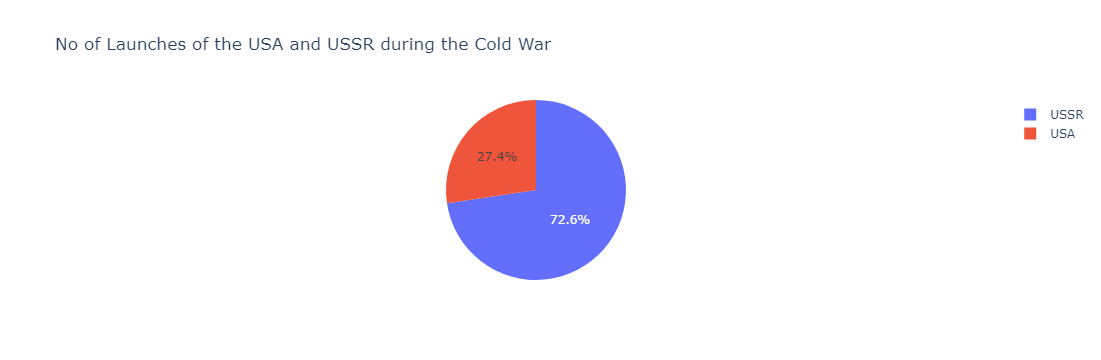

In [252]:
figure = px.pie(names=cold_war_nooflaunches.index, values=cold_war_nooflaunches.values, title="No of Launches of the USA and USSR during the Cold War")

figure.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [266]:
launches_by_both = df_cold_war.copy()[["Date", "ISO_code"]]
launches_by_both["Date"] = launches_by_both["Date"].dt.year

launches_by_both

Date ISO_code
4323  1957     USSR
4322  1957     USSR
4321  1957      USA
4320  1958      USA
4319  1958      USA
...    ...      ...
1724  1991      USA
1723  1991     USSR
1722  1991      USA
1721  1991      USA
1719  1991     USSR

[2353 rows x 2 columns]

In [267]:
launches_by_both = launches_by_both.groupby(["Date", "ISO_code"]).size().reset_index(name='Total_Launches')
launches_by_both

Date ISO_code  Total_Launches
0   1957      USA               1
1   1957     USSR               2
2   1958      USA              17
3   1958     USSR               5
4   1959      USA              16
..   ...      ...             ...
65  1989     USSR              24
66  1990      USA              26
67  1990     USSR              34
68  1991      USA              18
69  1991     USSR              27

[70 rows x 3 columns]

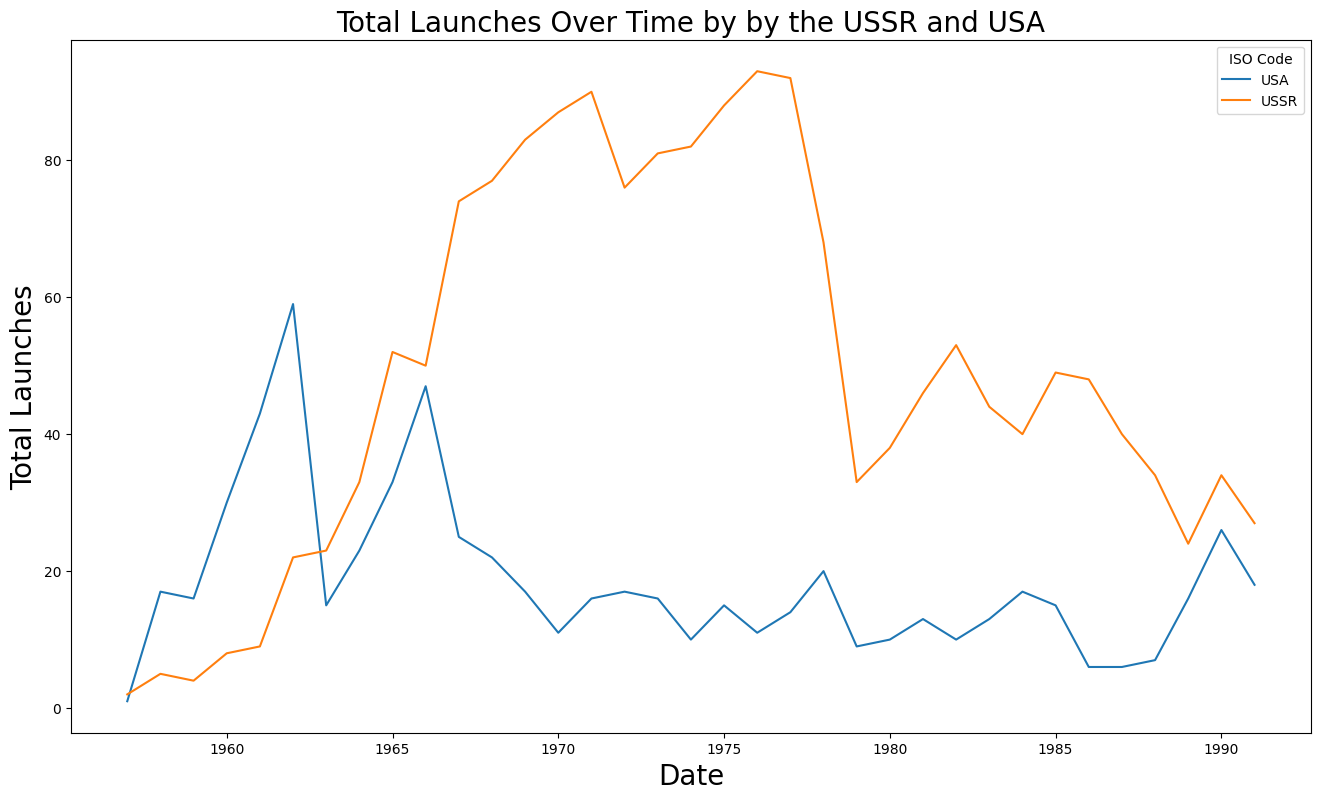

In [270]:
mplt.figure(figsize=(16, 9))

mplt.title('Total Launches Over Time by by the USSR and USA', fontsize=20)
mplt.xlabel('Date', fontsize=20)
mplt.ylabel('Total Launches', fontsize=20)

for iso_code in launches_by_both['ISO_code'].unique():
    iso_data = launches_by_both[launches_by_both['ISO_code'] == iso_code]
    mplt.plot(iso_data['Date'], iso_data['Total_Launches'])

mplt.legend(launches_by_both["ISO_code"].unique(), title='ISO Code')

mplt.show()


## Chart the Total Number of Mission Failures Year on Year.

In [313]:
df_data4=df_data

In [314]:
df_data4=df_data4.dropna(subset=['Date'])

In [315]:
df_data4

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4197 rows x 8 columns]

In [317]:
total_missions_per_year = df_data4.copy()[["Date", "Mission_Status"]]
total_missions_per_year["Date"] = total_missions_per_year["Date"].dt.year

In [318]:
total_missions_per_year = total_missions_per_year.groupby("Date").agg(Total_Launches=('Date', 'count')).reset_index()


In [319]:
total_missions_per_year


Date  Total_Launches
0   1957               3
1   1958              22
2   1959              20
3   1960              38
4   1961              52
..   ...             ...
59  2016              88
60  2017              90
61  2018             117
62  2019             107
63  2020              63

[64 rows x 2 columns]

In [320]:
failures_per_year = df_data4.copy()[["Date", "Mission_Status"]].query("Mission_Status == 'Failure'")

failures_per_year["Date"] = failures_per_year["Date"].dt.year

failures_per_year = failures_per_year.groupby("Date").agg(Failures=('Date', 'count')).reset_index()

failures_per_year

Date  Failures
0   1957         1
1   1958        14
2   1959         9
3   1960        19
4   1961        17
..   ...       ...
58  2016         2
59  2017         5
60  2018         2
61  2019         5
62  2020         6

[63 rows x 2 columns]

In [321]:
df_failures = pd.merge(total_missions_per_year, failures_per_year, on="Date")

df_failures

Date  Total_Launches  Failures
0   1957               3         1
1   1958              22        14
2   1959              20         9
3   1960              38        19
4   1961              52        17
..   ...             ...       ...
58  2016              88         2
59  2017              90         5
60  2018             117         2
61  2019             107         5
62  2020              63         6

[63 rows x 3 columns]

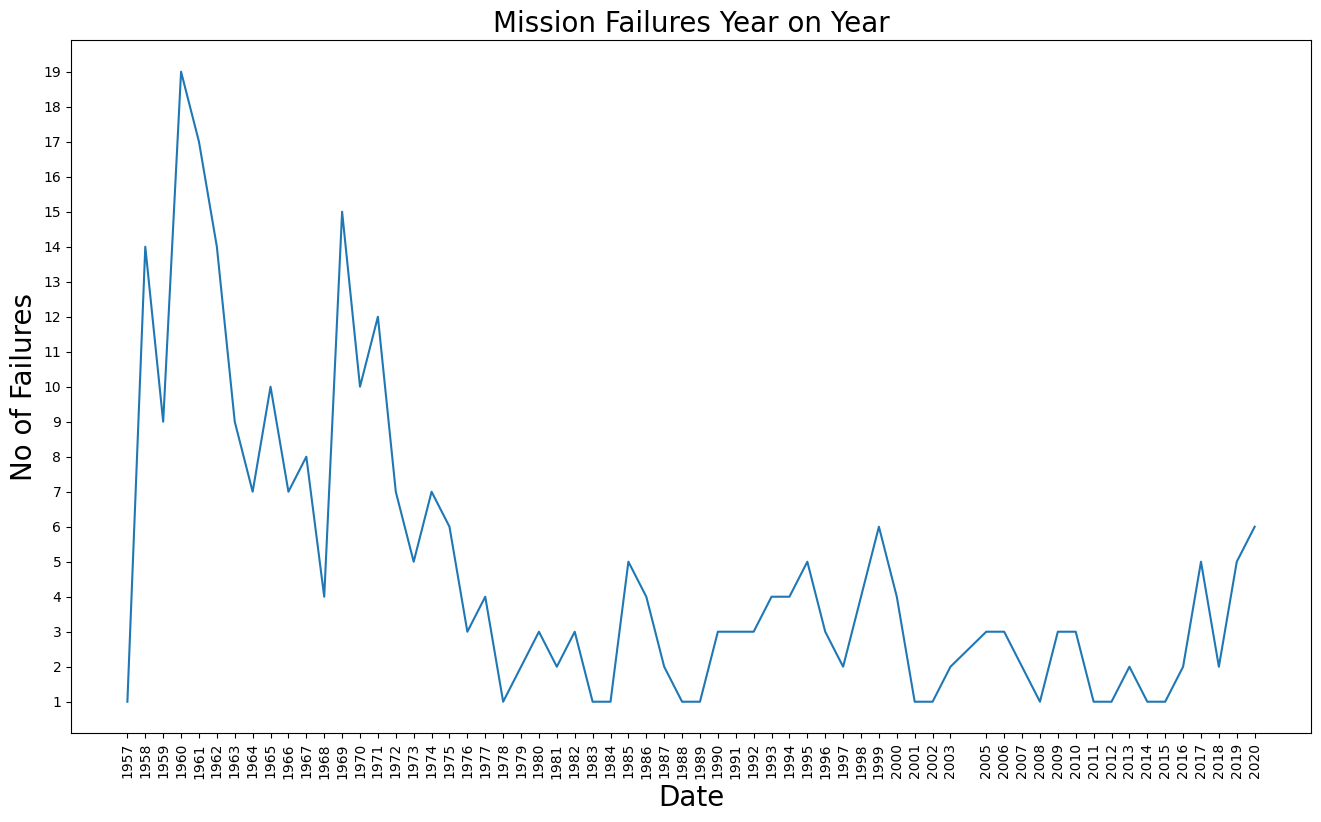

In [322]:
mplt.figure(figsize=(16, 9))

mplt.title('Mission Failures Year on Year', fontsize=20)
mplt.xlabel('Date', fontsize=20)
mplt.ylabel('No of Failures', fontsize=20)
mplt.yticks(range(0, 21))
mplt.xticks(df_failures["Date"], rotation=90)

mplt.plot(df_failures["Date"], df_failures["Failures"])

mplt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [323]:
df_failures["Failure %"]=((df_failures['Failures']/df_failures['Total_Launches'])*100)

In [324]:
df_failures

Date  Total_Launches  Failures  Failure %
0   1957               3         1      33.33
1   1958              22        14      63.64
2   1959              20         9      45.00
3   1960              38        19      50.00
4   1961              52        17      32.69
..   ...             ...       ...        ...
58  2016              88         2       2.27
59  2017              90         5       5.56
60  2018             117         2       1.71
61  2019             107         5       4.67
62  2020              63         6       9.52

[63 rows x 4 columns]

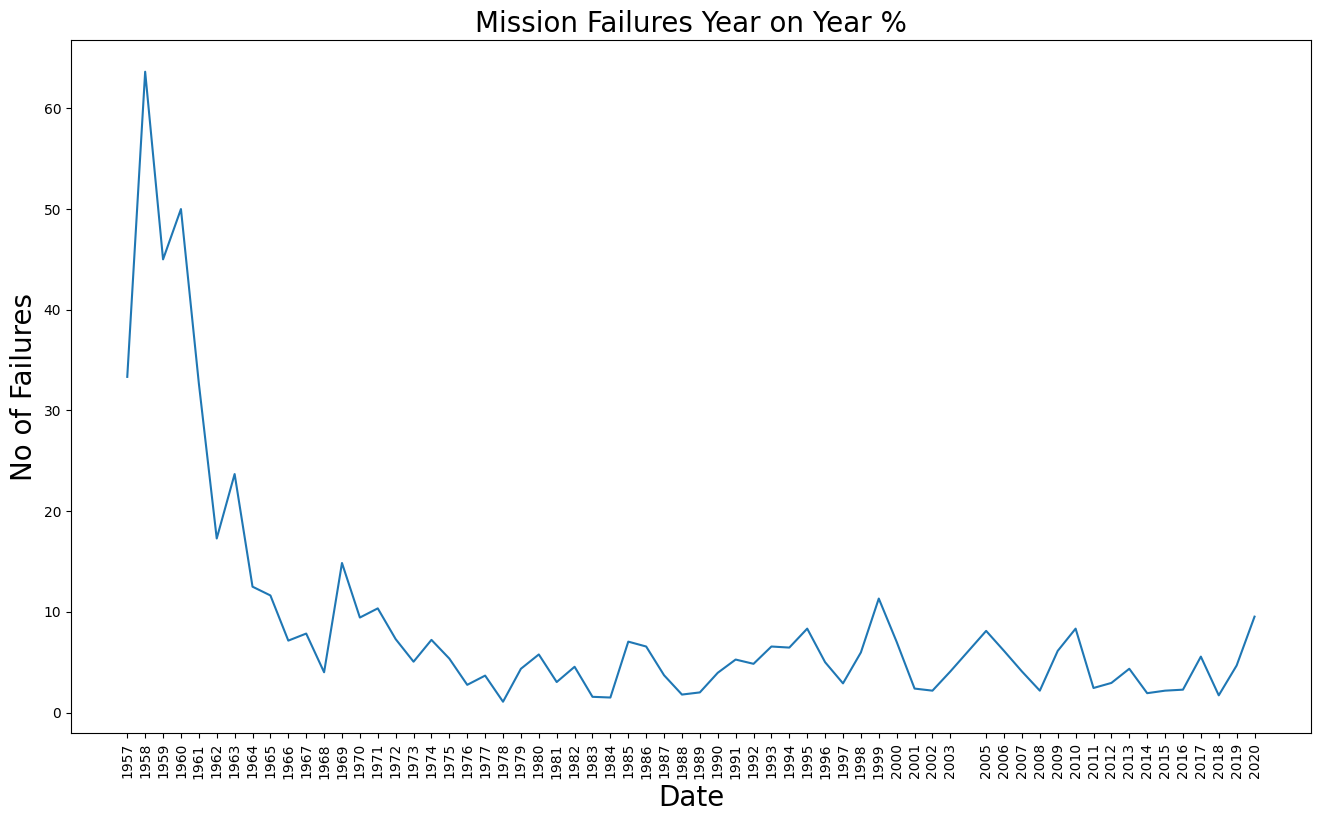

In [326]:
mplt.figure(figsize=(16, 9))

mplt.title('Mission Failures Year on Year %', fontsize=20)
mplt.xlabel('Date', fontsize=20)
mplt.ylabel('No of Failures', fontsize=20)
mplt.xticks(df_failures["Date"], rotation=90)

mplt.plot(df_failures["Date"], df_failures["Failure %"])

mplt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [327]:
df_data5=df_data

In [328]:
df_data5=df_data5.dropna(subset=['Date'])

In [329]:
df_data5

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4197 rows x 8 columns]

In [330]:
countries_launches_per_year = df_data5.copy()[["ISO_code", "Date"]]
countries_launches_per_year["Date"] = countries_launches_per_year["Date"].dt.year

countries_launches_per_year

ISO_code  Date
0         USA  2020
1         CHN  2020
2         USA  2020
3         KAZ  2020
4         USA  2020
...       ...   ...
4319      USA  1958
4320      USA  1958
4321      USA  1957
4322      KAZ  1957
4323      KAZ  1957

[4197 rows x 2 columns]

In [331]:
countries_launches_per_year = countries_launches_per_year.groupby(["ISO_code", "Date"]).agg(Total_Launches=("ISO_code", "count")).reset_index()

countries_launches_per_year

ISO_code  Date  Total_Launches
0        AUS  1968               1
1        AUS  1969               1
2        AUS  1970               2
3        AUS  1971               1
4        BRA  1999               1
..       ...   ...             ...
398      USA  2016              25
399      USA  2017              29
400      USA  2018              34
401      USA  2019              27
402      USA  2020              21

[403 rows x 3 columns]

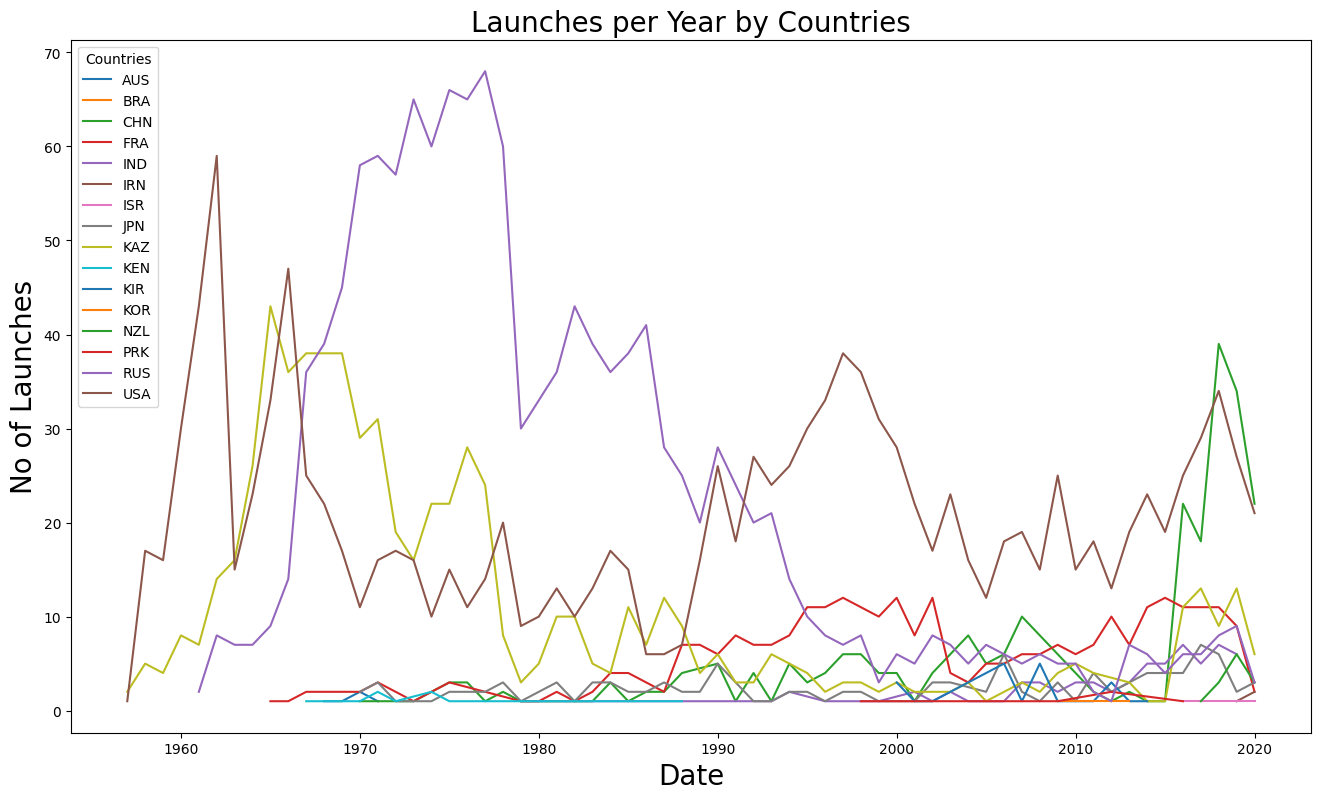

In [332]:
mplt.figure(figsize=(16, 9))

mplt.title('Launches per Year by Countries', fontsize=20)
mplt.xlabel('Year', fontsize=20)
mplt.ylabel('No of Launches', fontsize=20)

for country in countries_launches_per_year['ISO_code'].unique():
    country_data = countries_launches_per_year[countries_launches_per_year["ISO_code"] == country]
    mplt.plot(country_data['Date'], country_data['Total_Launches'])

mplt.legend(countries_launches_per_year["ISO_code"].unique(), title='Countries')

mplt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [302]:
dfdata6=df_data

In [303]:
dfdata6 = dfdata6.dropna(subset=['Date'])

In [304]:
dfdata6

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                    Date                                        Detail  \
0    2020-08-07 05:12:00  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1    2020-08-06 04:01:00           Long March 2D | Gaofen-9 04 & Q-SAT   
2    2020-08-04 23:57:00            Starship Prototype | 150 Meter Hop   
3    2020-07-30 21:25:00  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4    2020-07-30 11:50:00                    Atlas V 541 | Perseverance   
...                  ...                                           ...   
4319 1958-02-05 07:33:00                     Vanguard | Vanguard TV3BU   
4320 1958-02-01 03:48:00                           Juno I | Explorer 1   
4321 1957-12-06 16:44:00                       Vanguard | Vanguard TV3   
4322 1957-11-03 02:30:00                    Sputnik 8K71PS | Sputnik-2   
4323 1957-10-04 19:28:00                    Sputnik 8K71PS | Sputnik-1   

      Rocket_Status  Price Mission_Status ISO_code  
0      StatusActive  50.00        Success      USA  
1      StatusActive  29.75        Success      CHN  
2      StatusActive    NaN        Success      USA  
3      StatusActive  65.00        Success      KAZ  
4      StatusActive 145.00        Success      USA  
...             ...    ...            ...      ...  
4319  StatusRetired    NaN        Failure      USA  
4320  StatusRetired    NaN        Success      USA  
4321  StatusRetired    NaN        Failure      USA  
4322  StatusRetired    NaN        Success      KAZ  
4323  StatusRetired    NaN        Success      KAZ  

[4197 rows x 8 columns]

In [305]:
dfdata6["Date"] = pd.to_datetime(dfdata6["Date"], errors='coerce')
org_launches_per_yearonyear = dfdata6[["Organisation", "Date"]].copy()
org_launches_per_yearonyear["Year"] = org_launches_per_yearonyear["Date"].dt.year
org_launches_per_yearonyear

C:\Users\moham\AppData\Local\Temp\ipykernel_12652\4172204344.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Organisation                Date  Year
0          SpaceX 2020-08-07 05:12:00  2020
1            CASC 2020-08-06 04:01:00  2020
2          SpaceX 2020-08-04 23:57:00  2020
3       Roscosmos 2020-07-30 21:25:00  2020
4             ULA 2020-07-30 11:50:00  2020
...           ...                 ...   ...
4319      US Navy 1958-02-05 07:33:00  1958
4320         AMBA 1958-02-01 03:48:00  1958
4321      US Navy 1957-12-06 16:44:00  1957
4322    RVSN USSR 1957-11-03 02:30:00  1957
4323    RVSN USSR 1957-10-04 19:28:00  1957

[4197 rows x 3 columns]

In [306]:
org_launches_per_yearonyear = org_launches_per_yearonyear.groupby(["Organisation", "Year"]).agg(Total_Launches=("Organisation", "count")).reset_index()

org_launches_per_yearonyear

Organisation  Year  Total_Launches
0             AEB  1999               1
1            AMBA  1958               7
2             ASI  1967               1
3             ASI  1970               1
4             ASI  1971               2
..            ...   ...             ...
627        VKS RF  2020               3
628  Virgin Orbit  2020               1
629      Yuzhmash  1969               1
630      Yuzhmash  1991               1
631       i-Space  2019               1

[632 rows x 3 columns]

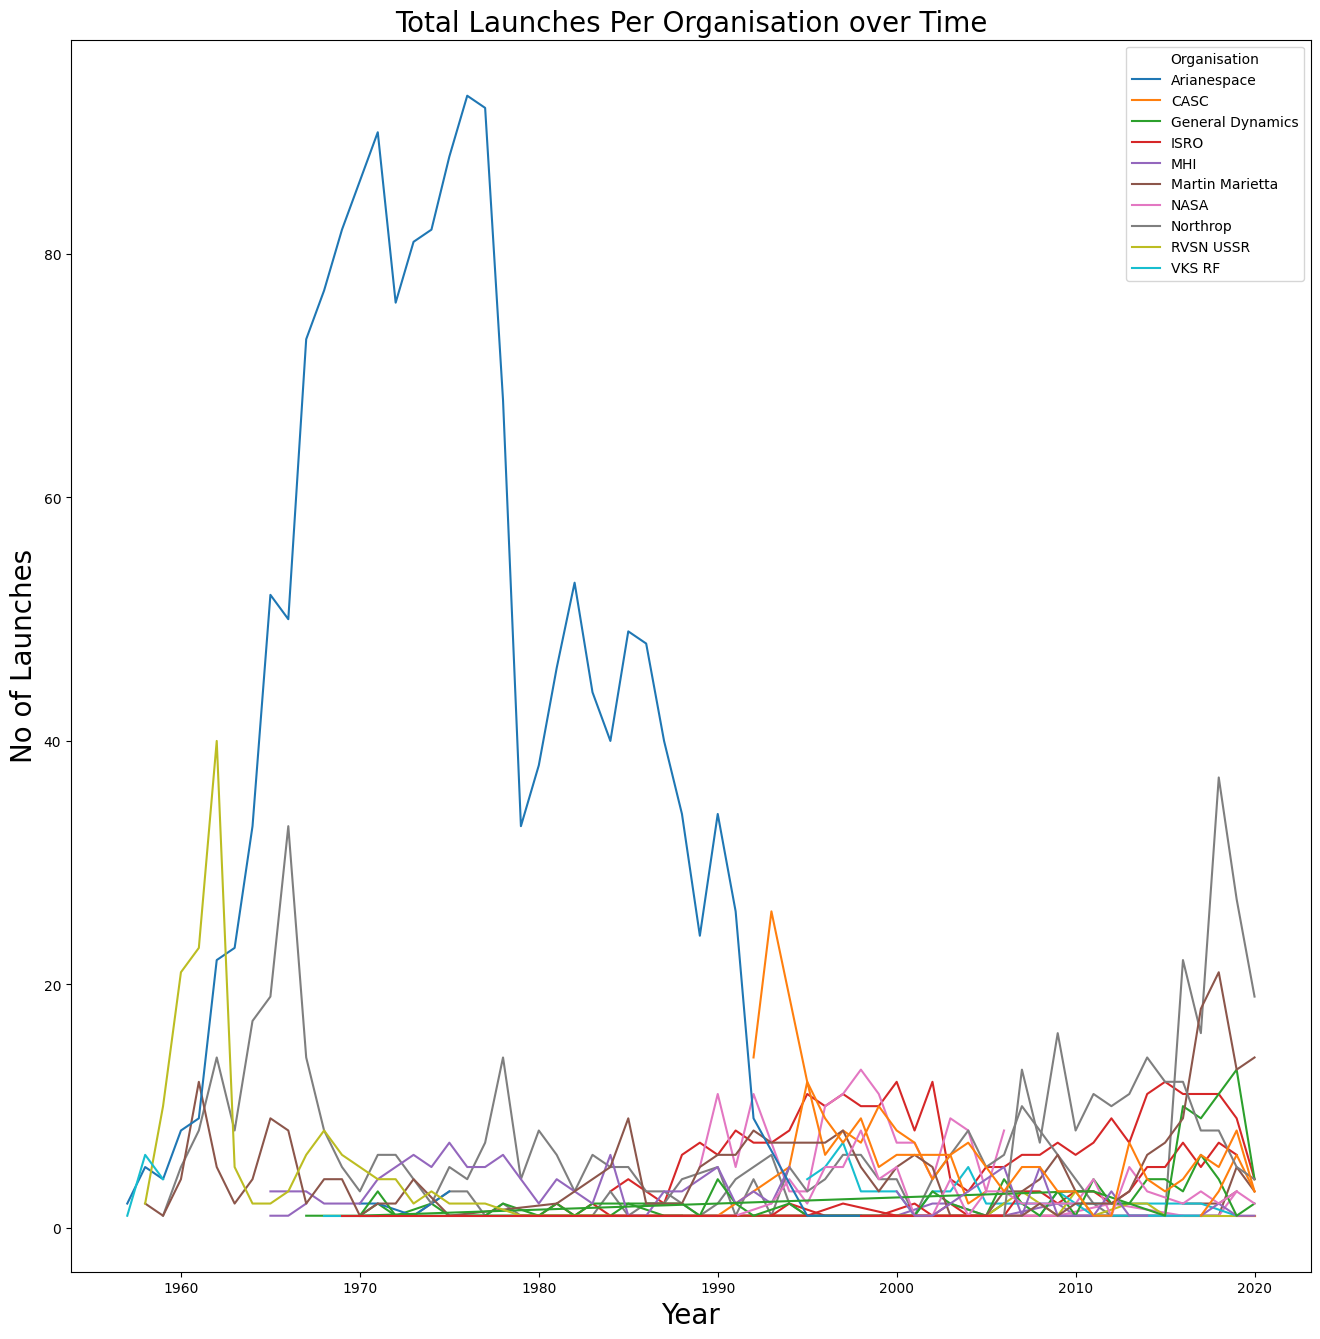

In [312]:
mplt.figure(figsize=(16, 16))

mplt.title('Total Launches Per Organisation over Time', fontsize=20)
mplt.xlabel('Year', fontsize=20)
mplt.ylabel('No of Launches', fontsize=20)

for org in org_launches_per_yearonyear['Organisation'].unique():
    org_data = org_launches_per_yearonyear[org_launches_per_yearonyear["Organisation"] == org]
    mplt.plot(org_data['Year'], org_data['Total_Launches'])

mplt.legend(org_launches_per_year["Organisation"].unique(), title='Organisation', bbox_to_anchor=(1, 1))

mplt.show()
